## Importações

In [1]:
import pandas as pd
import missingno as msn
import qgrid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

## Carregar dataset

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Ajustar as colunas

In [5]:
# Renomear as colunas para minusculas
df = df.rename(columns={col: col.lower() for col in df.columns})

# Colocar a coluna 'target' para o final
df = df[[col for col in df.columns if col not in "survived"] + ["survived"]]

# Alterar o sexo para:
# 0 - male
# 1 - female
df["sex"] = df["sex"].apply(lambda x: 0 if x == "male" else 1)

# Alterar o local de embarque:
# 0 - nulo
# 1 - C = Cherbourg
# 2 - Q = Queenstown
# 3 - S = Southampton
def embarked(value):
    if value == "C":
        return 1
    elif value == "Q":
        return 2
    elif value == "S":
        return 3
    else:
        return 0

df["embarked"] = df["embarked"].apply(embarked)


In [6]:
df.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   name         891 non-null    object 
 3   sex          891 non-null    int64  
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   ticket       891 non-null    object 
 8   fare         891 non-null    float64
 9   cabin        204 non-null    object 
 10  embarked     891 non-null    int64  
 11  survived     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


## Nulos

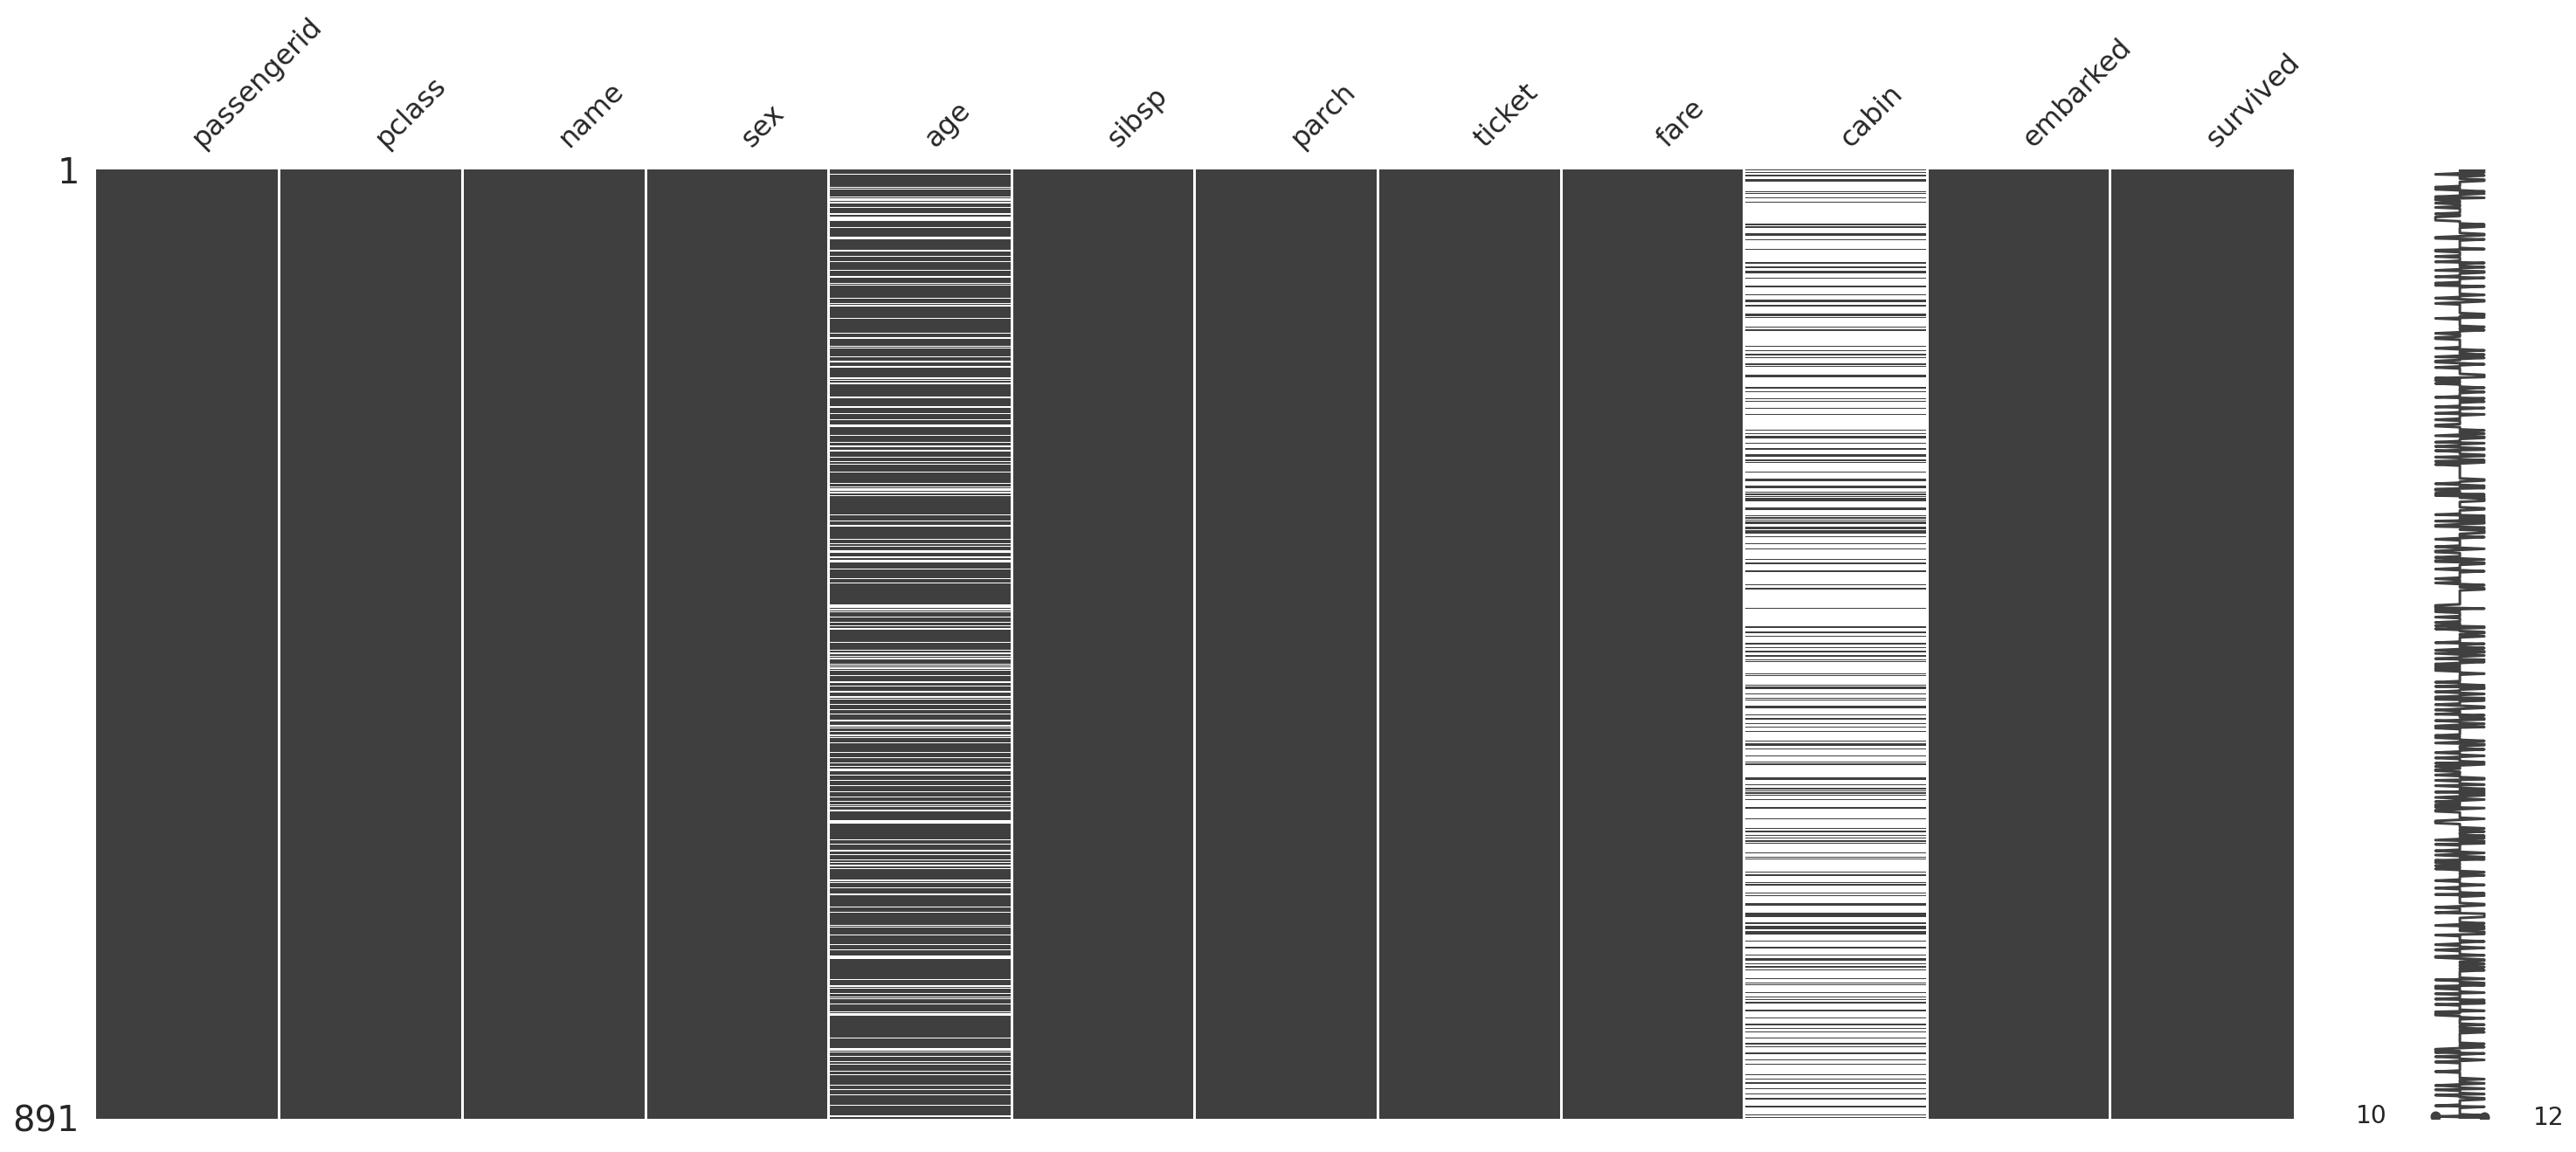

In [8]:
msn.matrix(df);

## Numéricos

### Describe

In [9]:
df[["age", "sibsp", "parch", "fare"]].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


### Histogramas

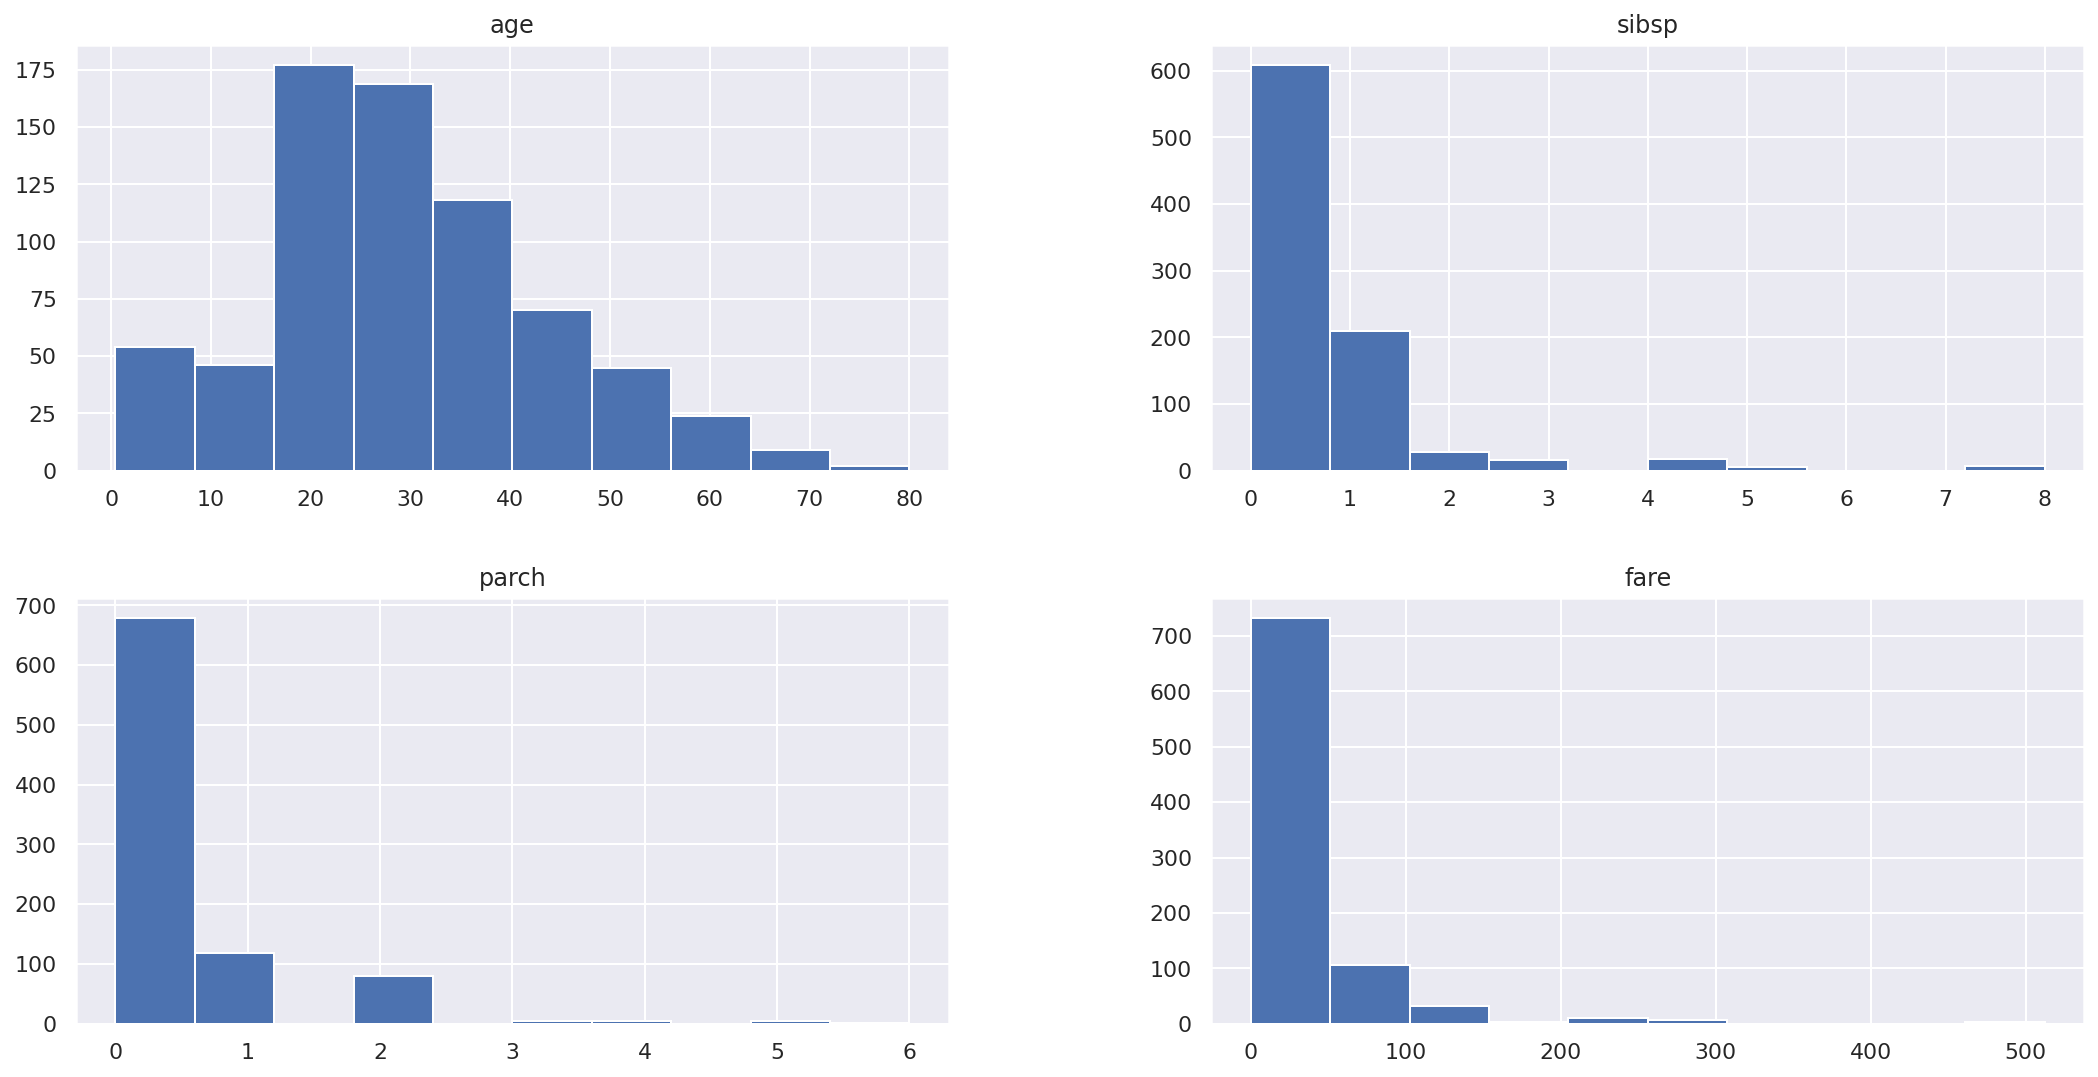

In [10]:

df[["age", "sibsp", "parch", "fare"]].hist(figsize=(18,9));


### Kernel Density

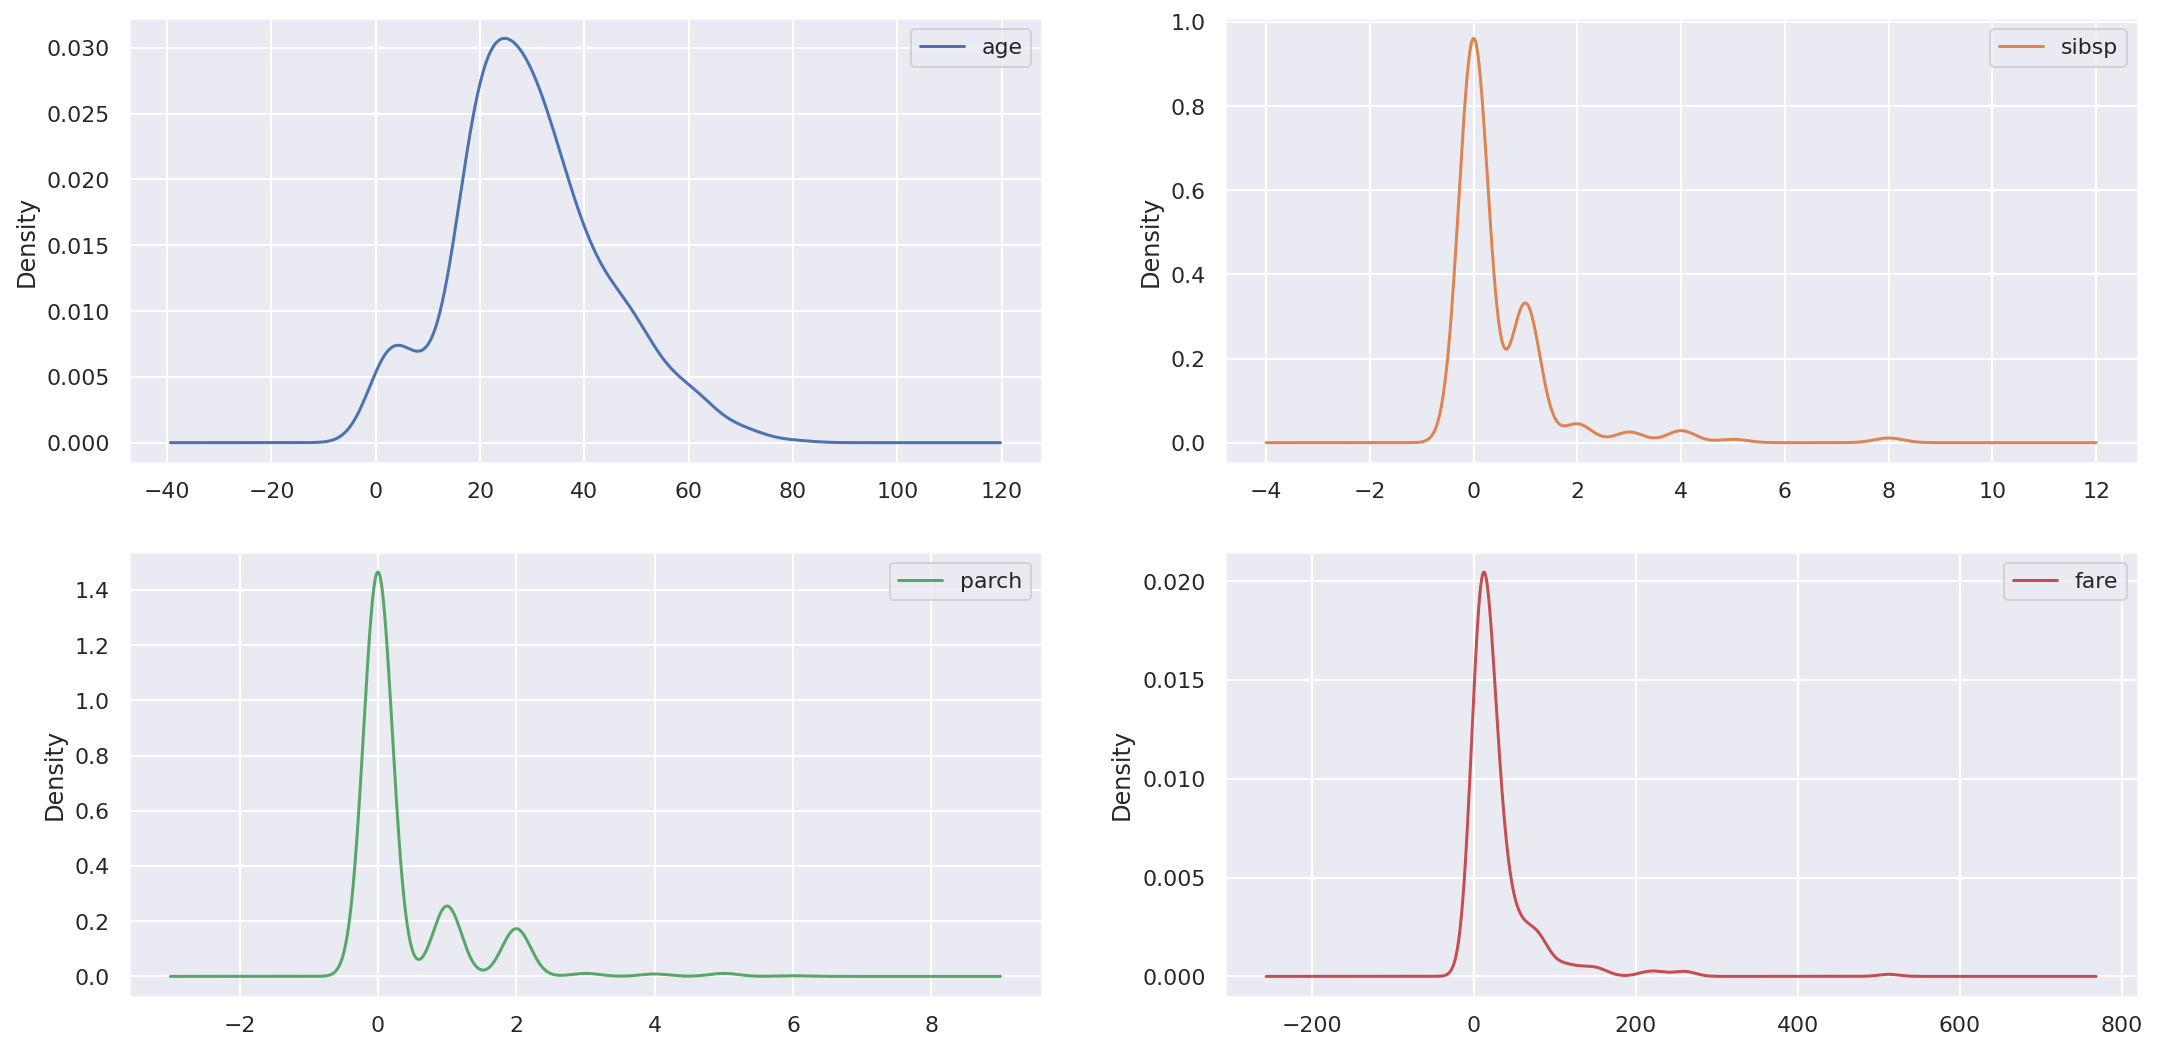

In [11]:
df[["age", "sibsp", "parch", "fare"]].plot(
    kind="density", subplots=True, layout=(2,2), sharex=False, figsize=(18,9)
);

### Box plot

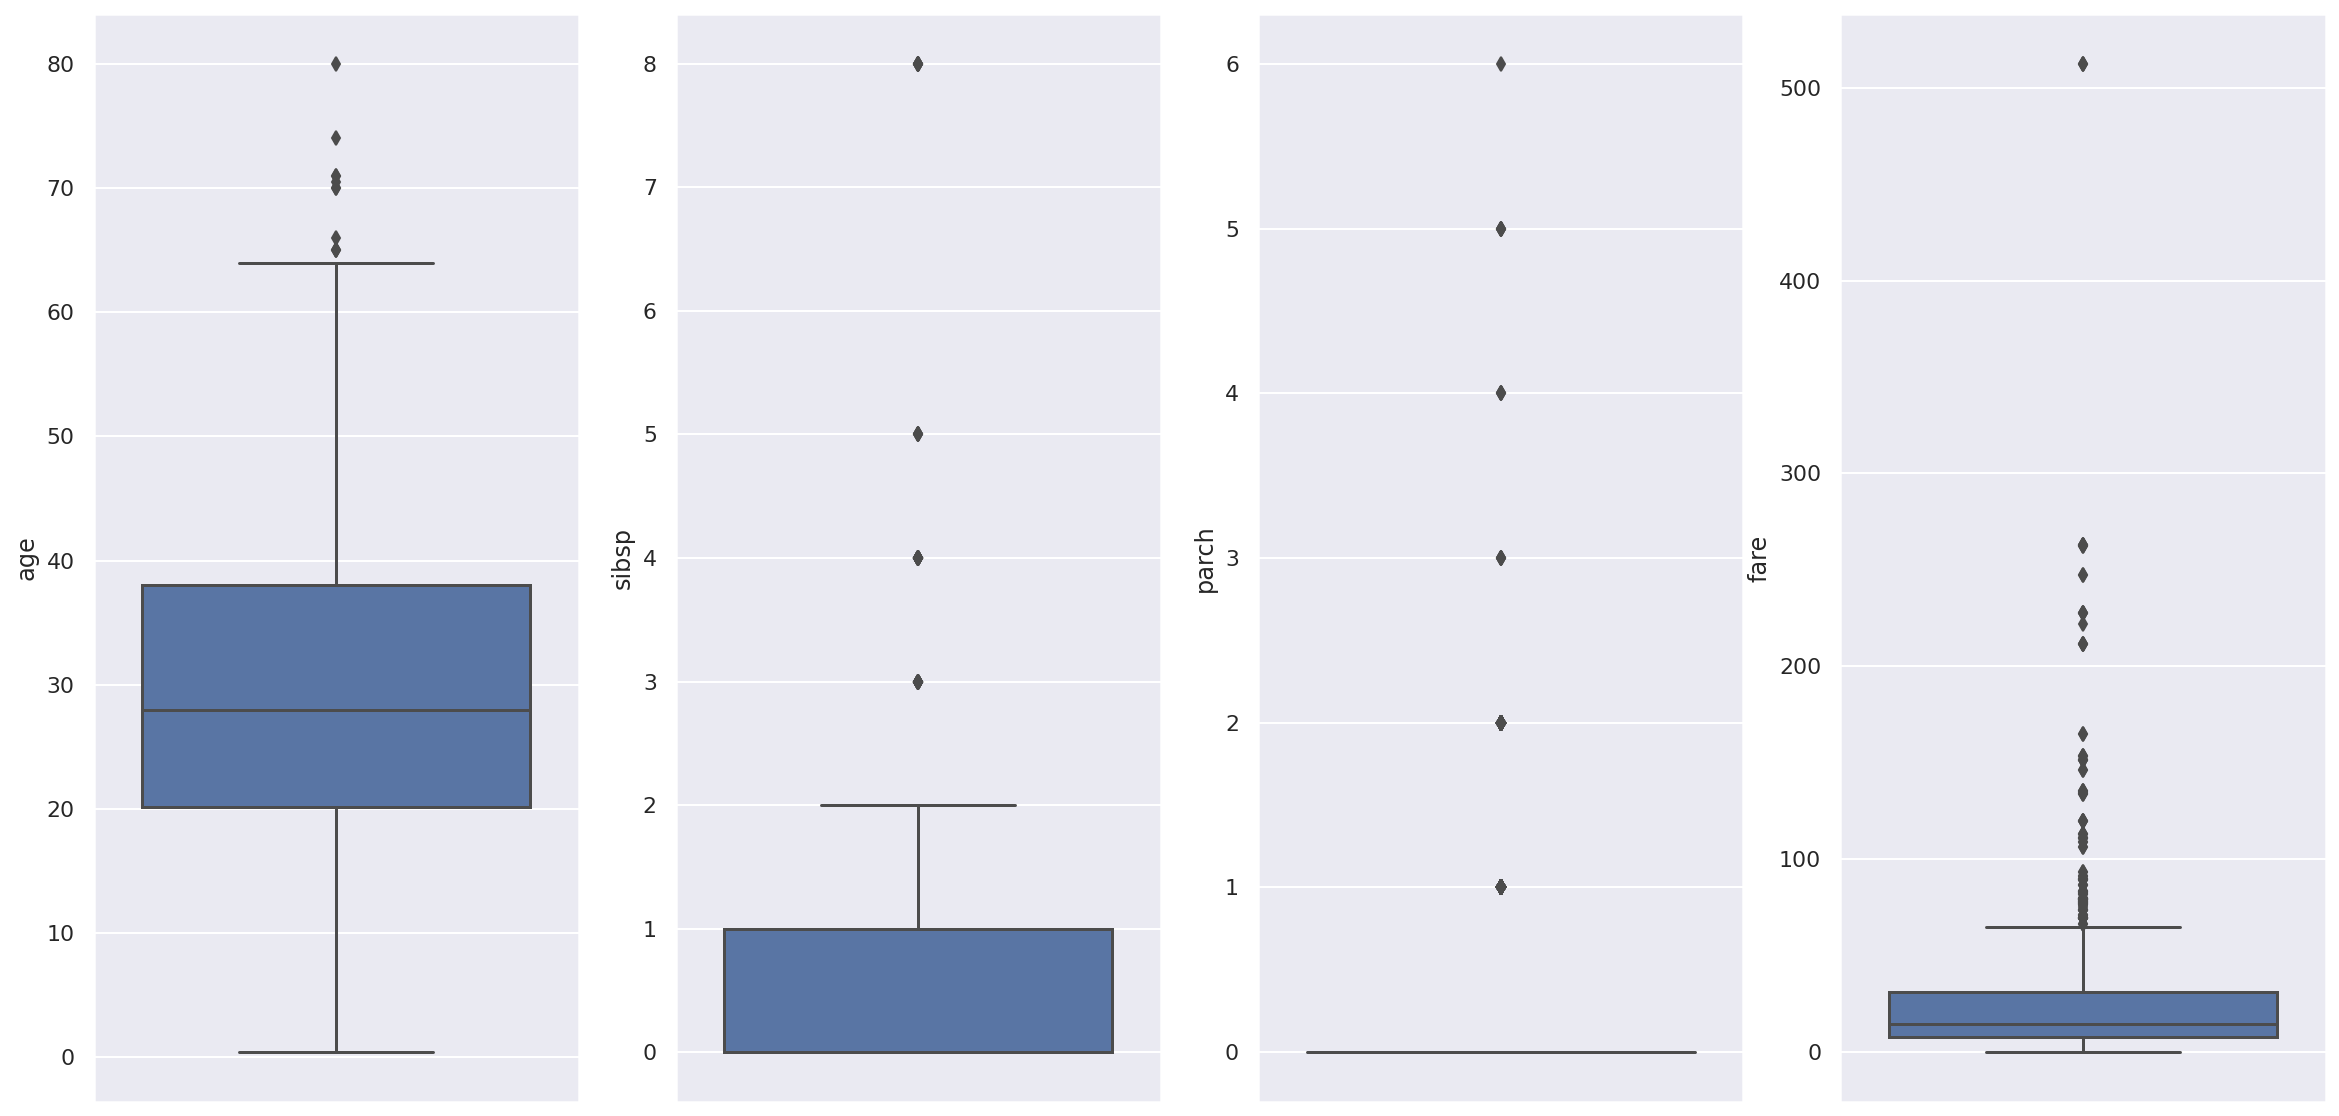

In [12]:
_, axes = plt.subplots(1, 4, sharey=False, sharex=False, figsize=(20, 10))

for i, col in enumerate(["age", "sibsp", "parch", "fare"]):
    sns.boxplot(y=col, data=df, ax=axes[i])

### Violin plot

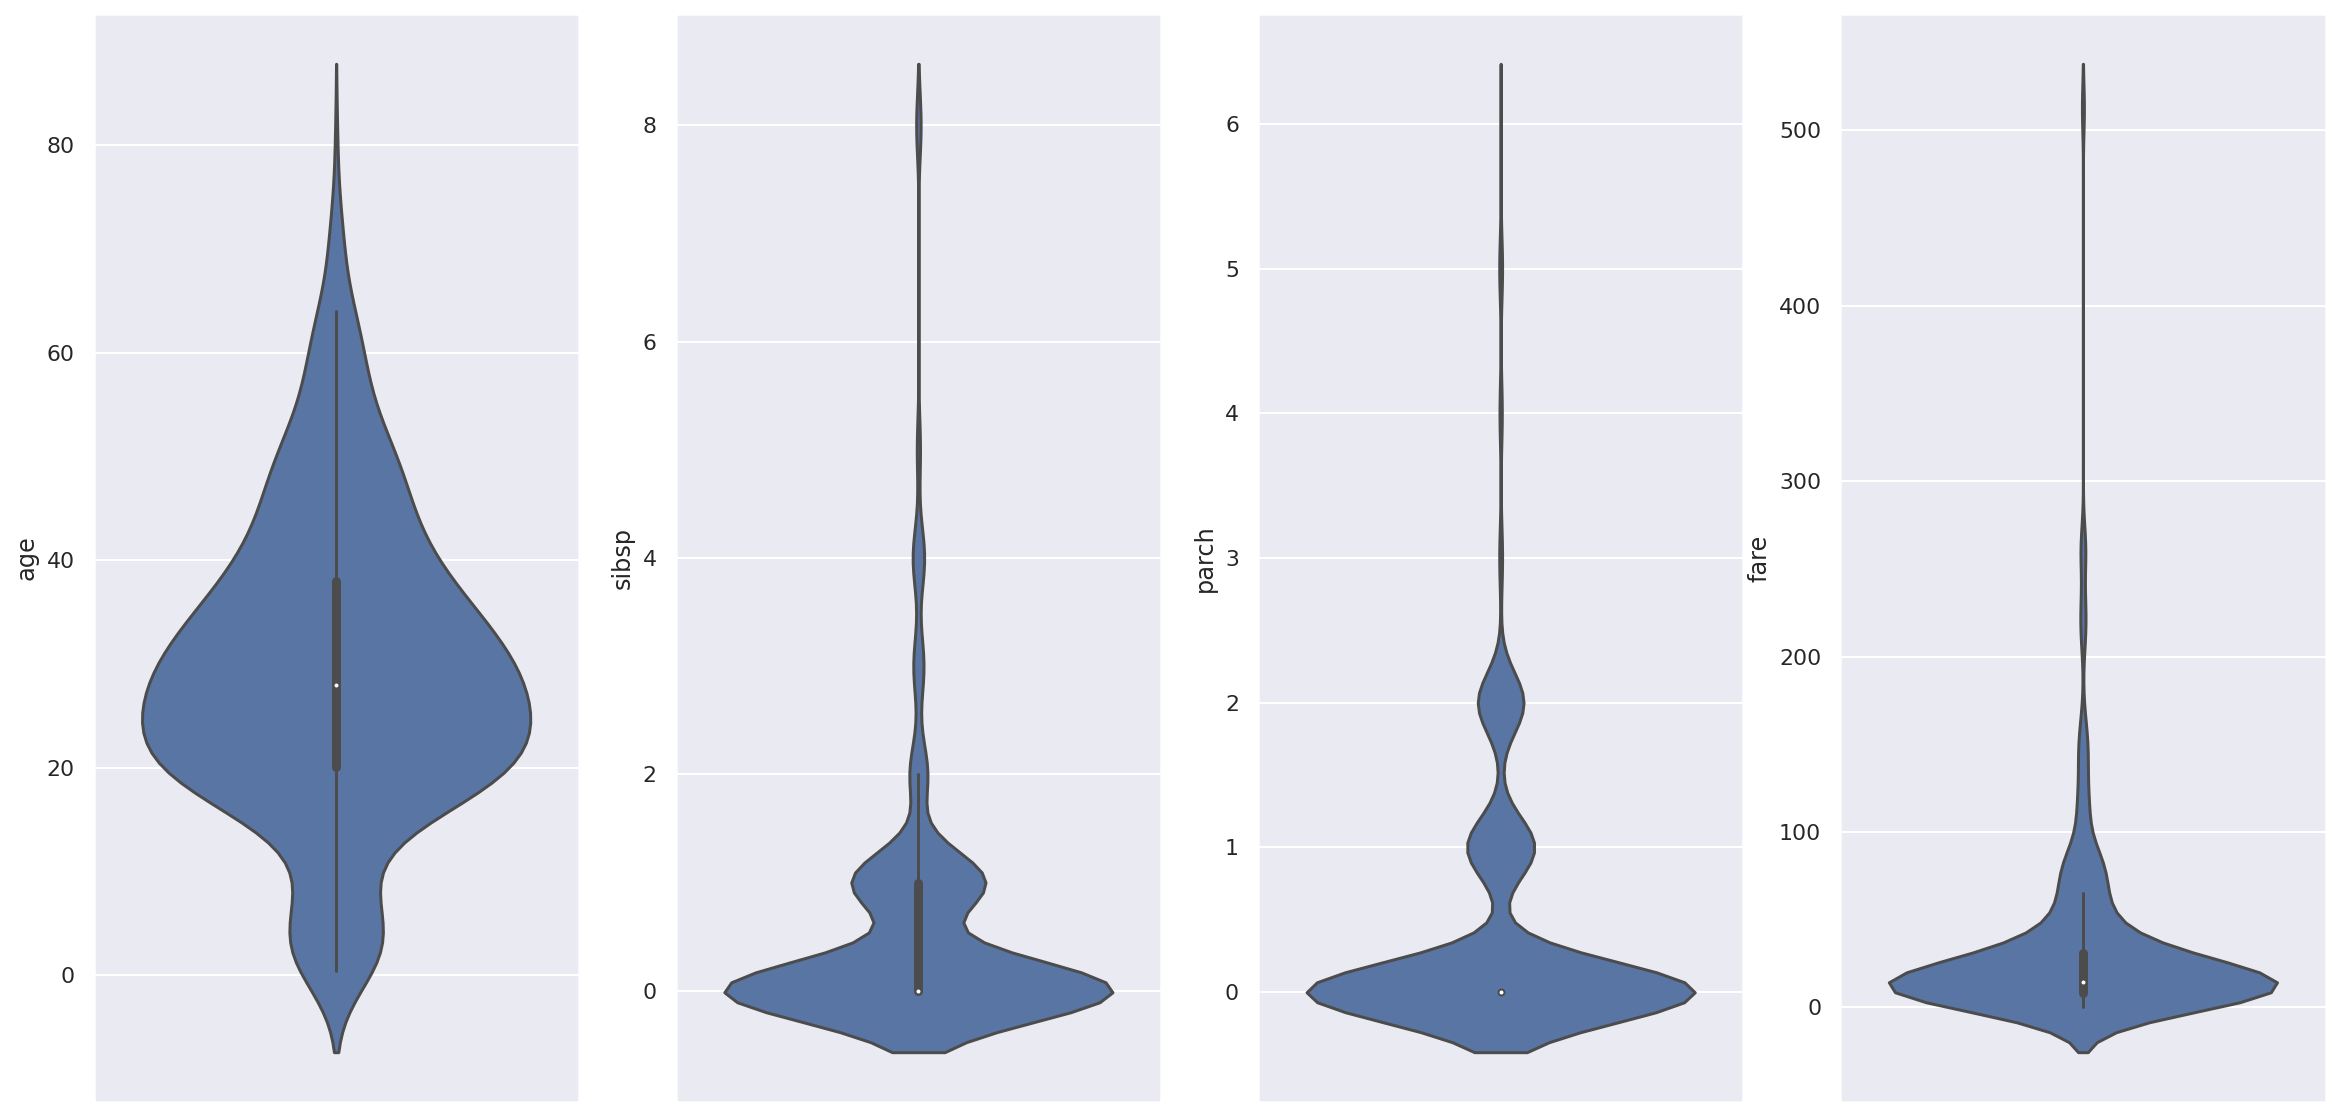

In [13]:
_, axes = plt.subplots(1, 4, sharey=False, sharex=False, figsize=(20, 10))

for i, col in enumerate(["age", "sibsp", "parch", "fare"]):
    sns.violinplot(y=col, data=df, ax=axes[i])

## Categórico

### Quantidade de valores únicos

In [14]:

df[["pclass", "sex", "ticket", "cabin", "embarked", "survived"]].nunique()


pclass        3
sex           2
ticket      681
cabin       147
embarked      4
survived      2
dtype: int64

### Describe de valores categóricos

In [15]:
df[["pclass", "sex", "ticket", "cabin", "embarked", "survived"]].astype("category").describe()

,pclass,sex,ticket,cabin,embarked,survived
count,891,891,891,204,891,891
unique,3,2,681,147,4,2
top,3,0,CA. 2343,B96 B98,3,0
freq,491,577,7,4,644,549


### Count plot

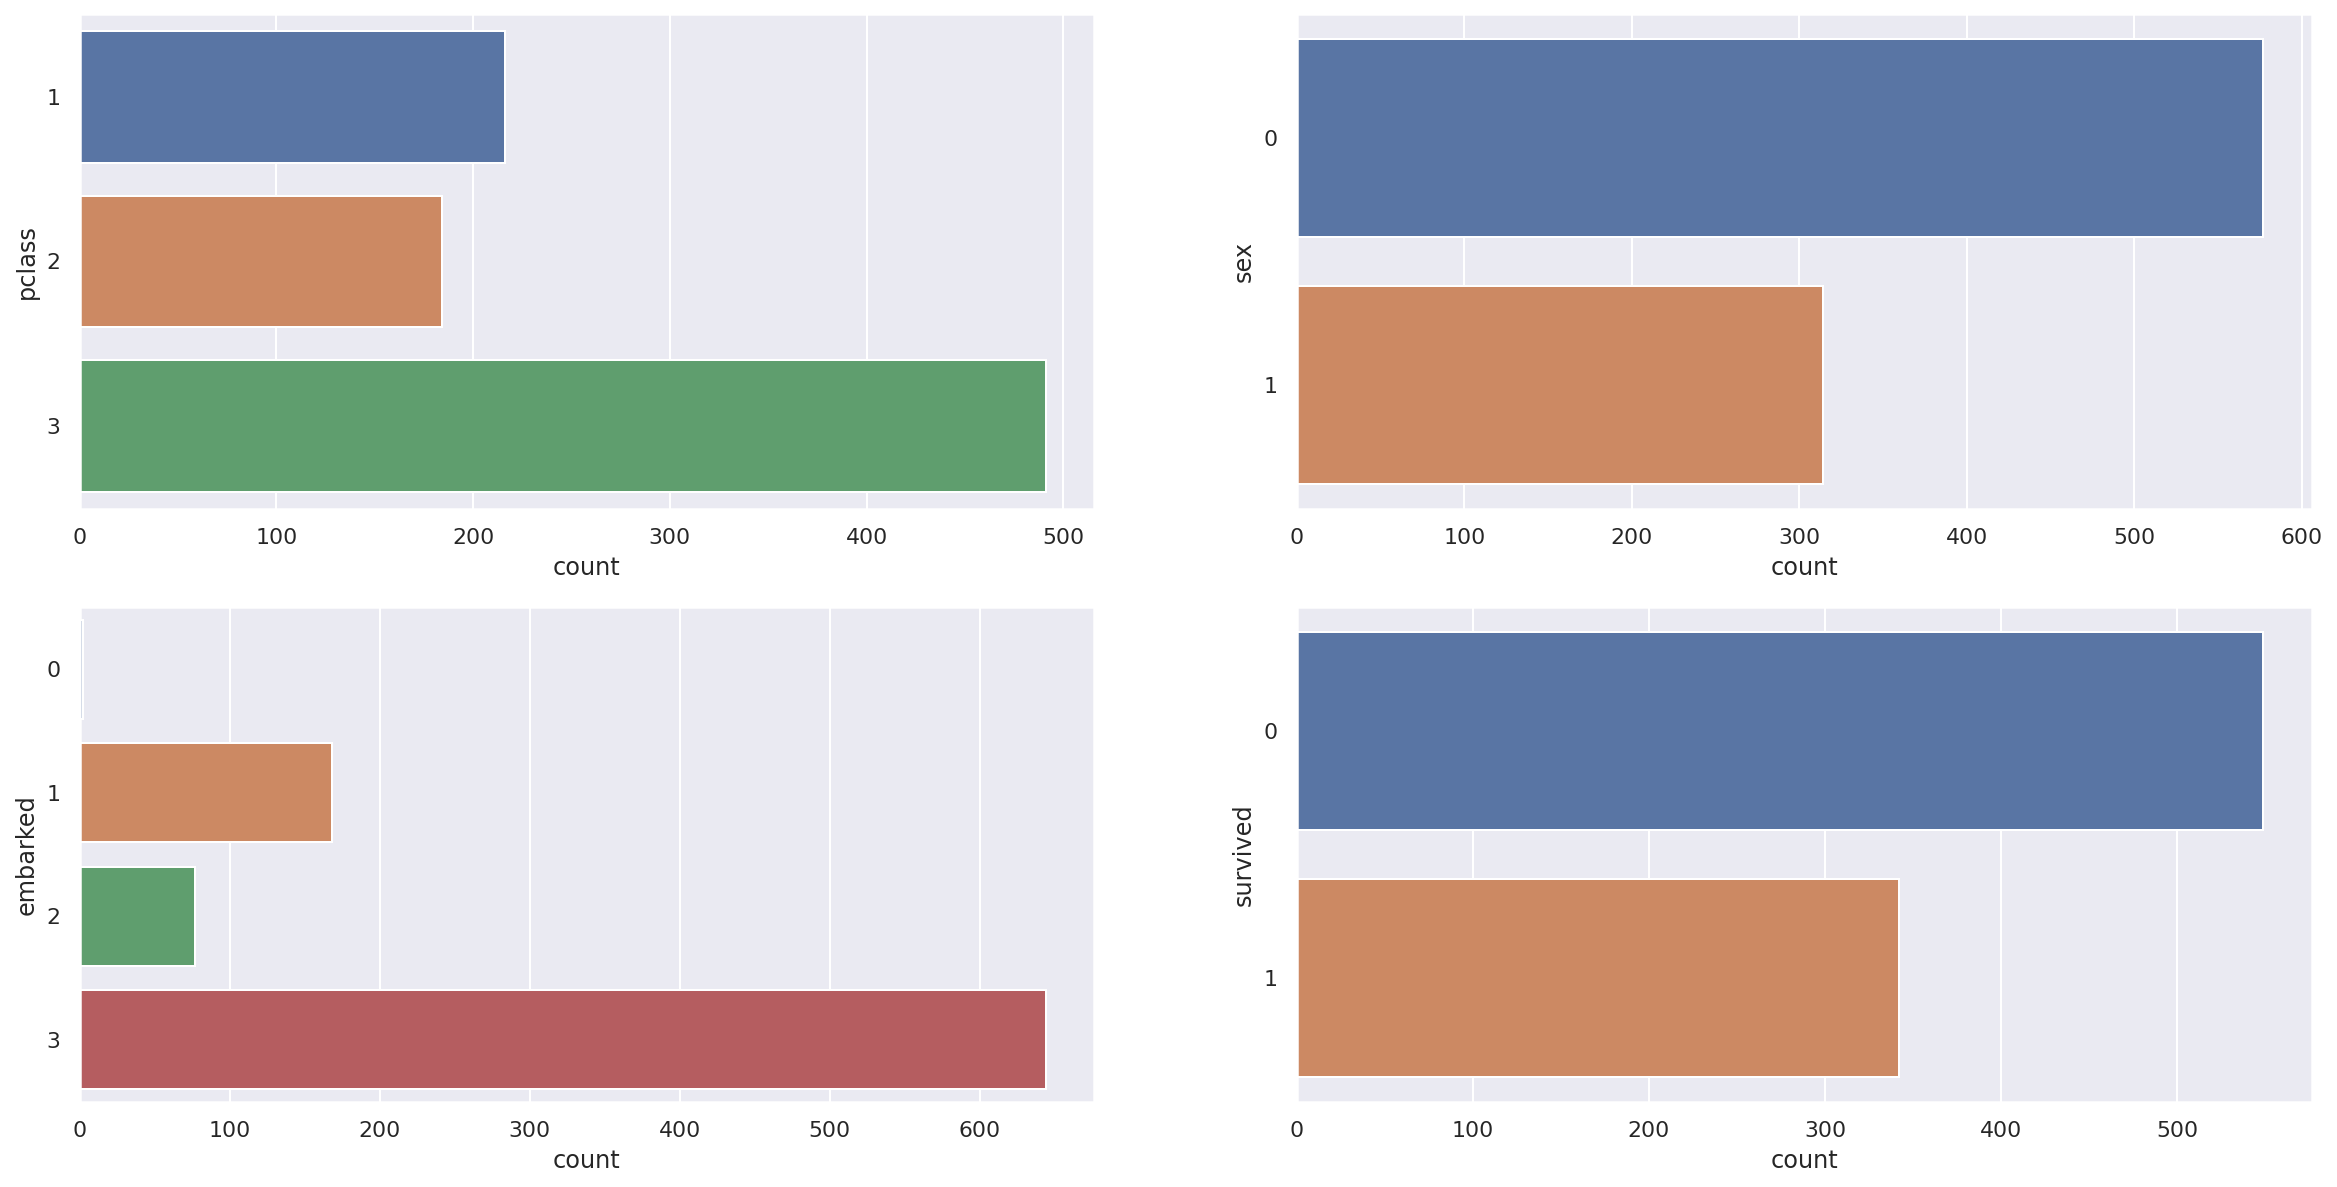

In [16]:
grid = (2, 2)

_, axes = plt.subplots(grid[0], grid[1], sharey=False, sharex=False, figsize=(20, 10))

for i, col in enumerate(["pclass", "sex", "embarked", "survived"]):
    sns.countplot(y=col, data=df, ax=axes[int(i/grid[0])][i % grid[1]])

## Análise multivariada

### Quantitativo vs Quantitativo: Correlação

In [17]:
df[["age", "sibsp", "parch", "fare"] + ["sex", "survived"]].corr().style.background_gradient(cmap='coolwarm')

,age,sibsp,parch,fare,sex,survived
age,1.000000,-0.308247,-0.189119,0.096067,-0.093254,-0.077221
sibsp,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.035322
parch,-0.189119,0.414838,1.000000,0.216225,0.245489,0.081629
fare,0.096067,0.159651,0.216225,1.000000,0.182333,0.257307
sex,-0.093254,0.114631,0.245489,0.182333,1.000000,0.543351
survived,-0.077221,-0.035322,0.081629,0.257307,0.543351,1.000000


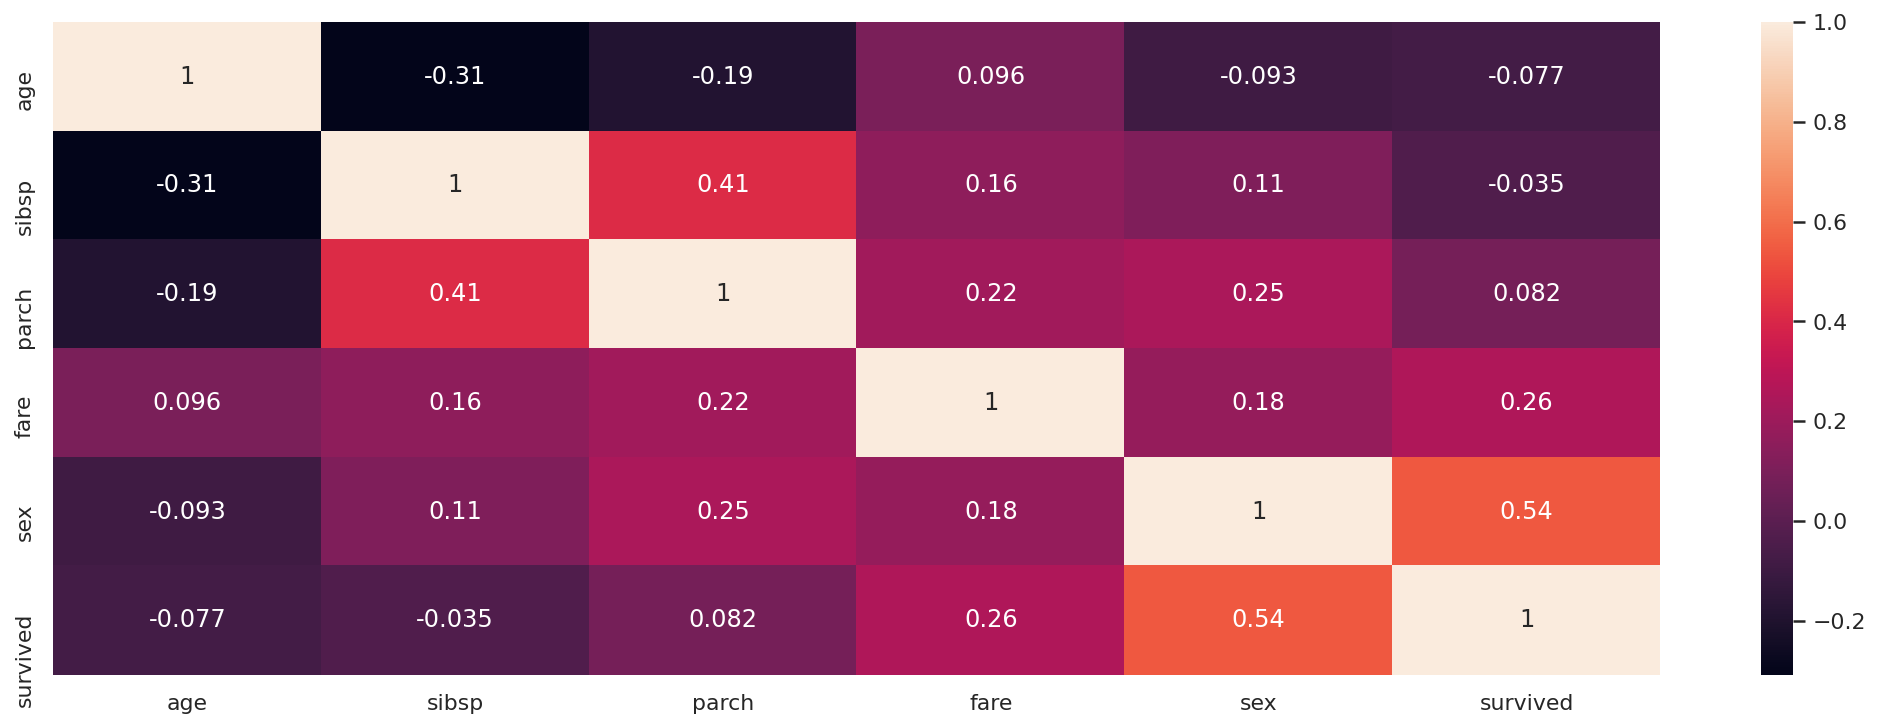

In [18]:
sns.set(rc={'figure.figsize':(18,6)})
sns.heatmap(df[["age", "sibsp", "parch", "fare"] + ["sex", "survived"]].corr(), annot=True);


https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607
https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas


### Quantitativo vs Quantitativo: Gráfico de pontos

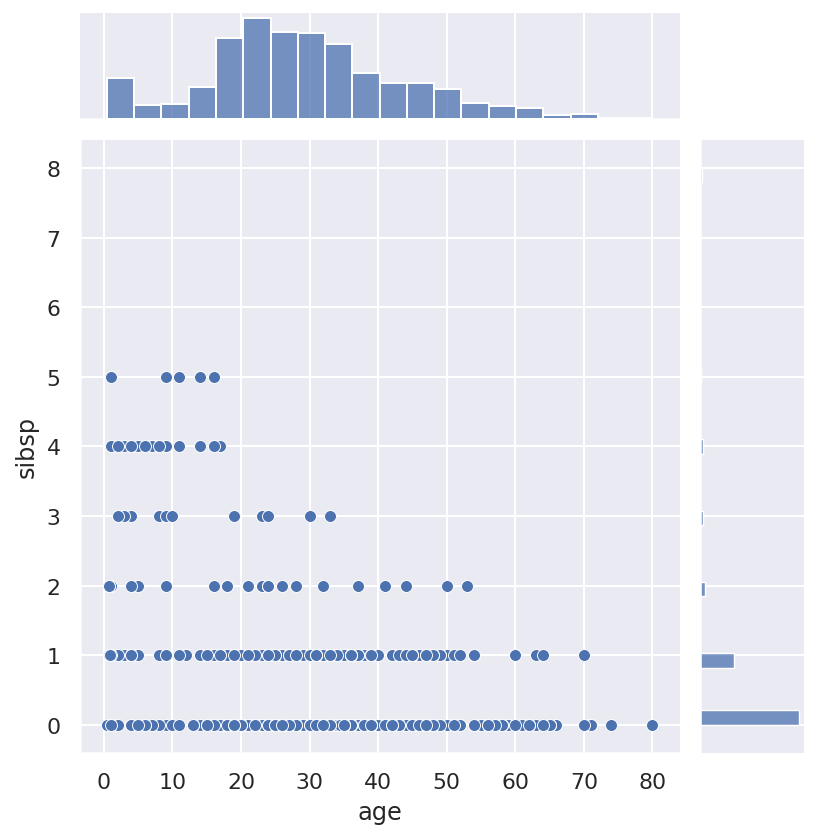

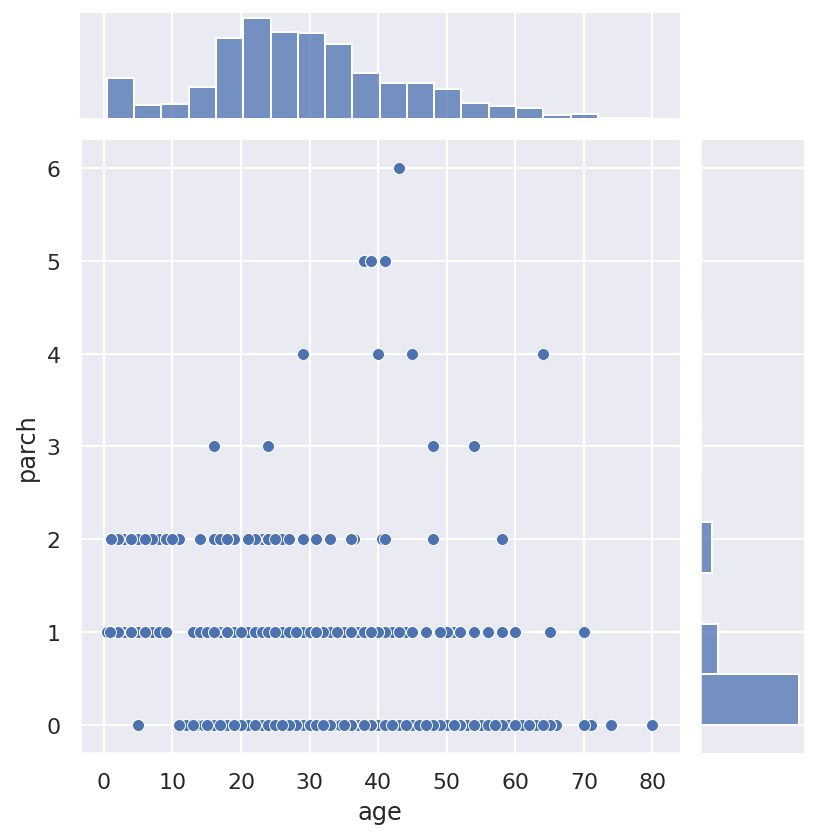

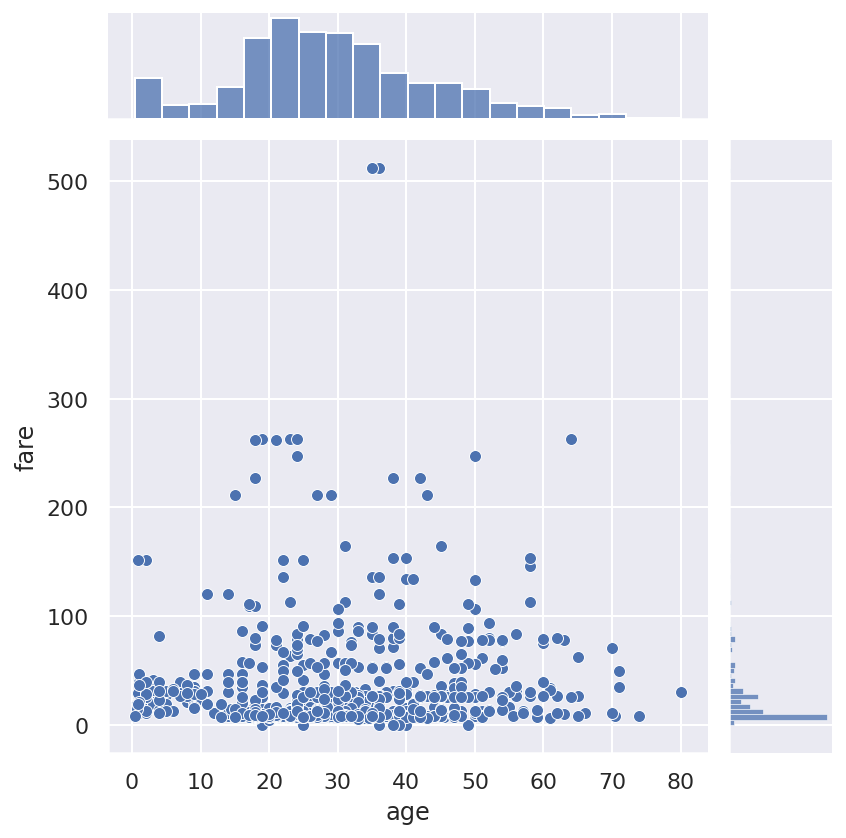

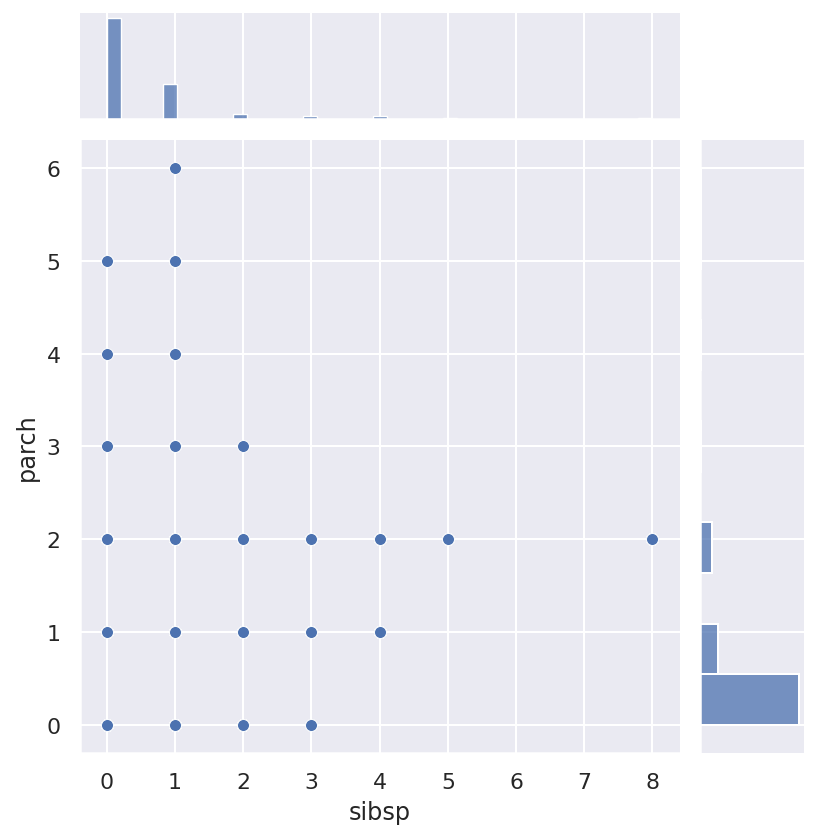

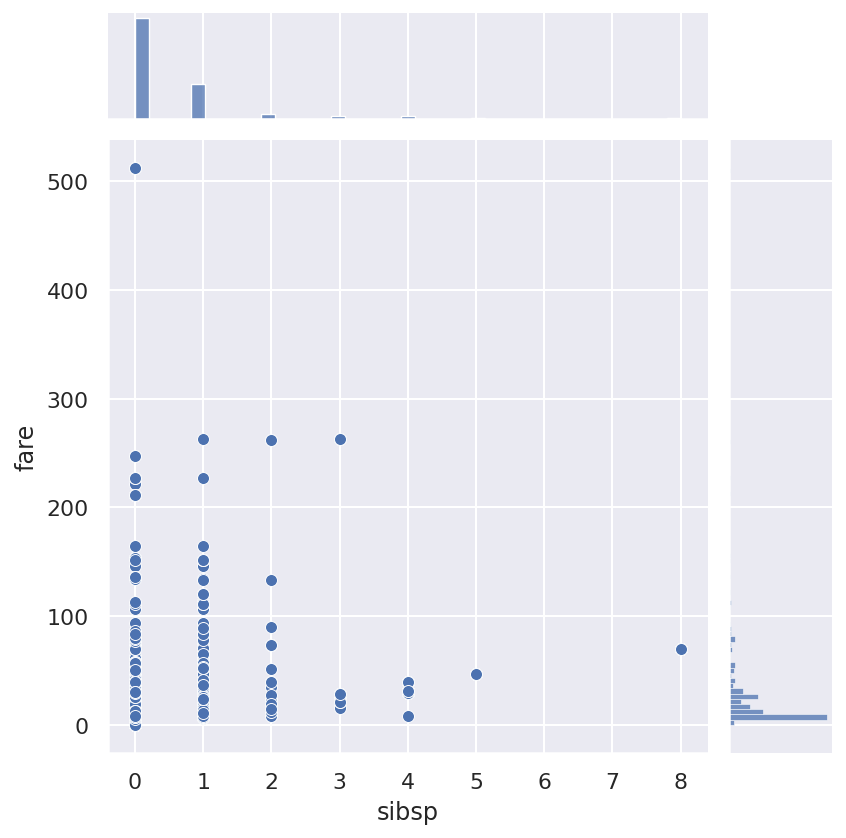

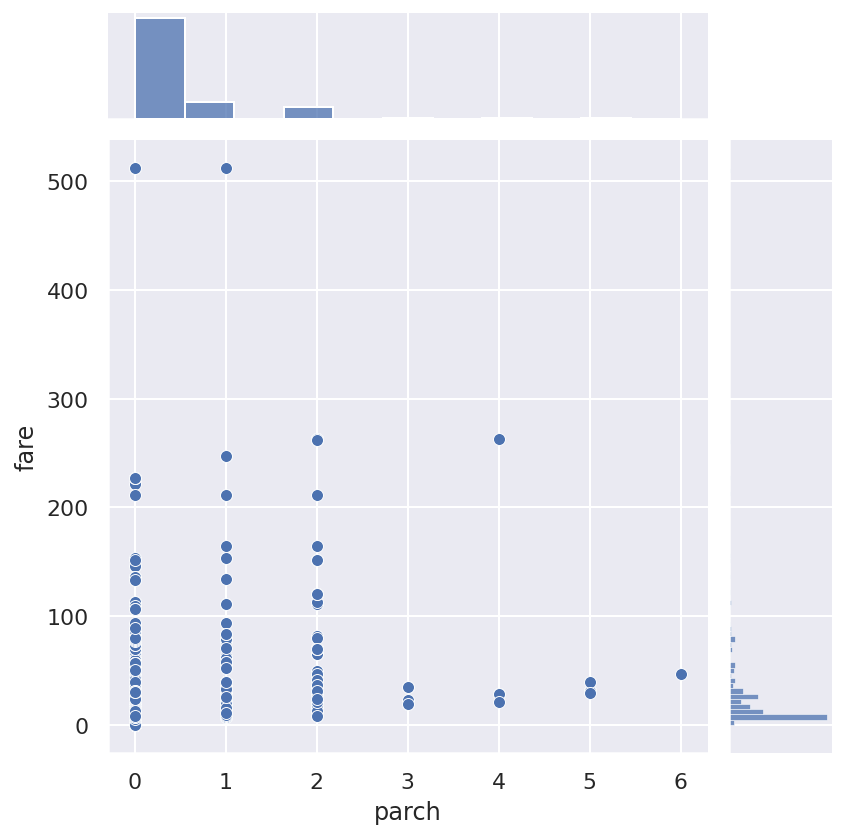

In [19]:

sns.set(rc={'figure.figsize':(20, 6)})

sns.jointplot(x="age", y="sibsp",   data=df, kind="scatter")
sns.jointplot(x="age", y="parch",   data=df, kind="scatter")
sns.jointplot(x="age", y="fare",    data=df, kind="scatter")
sns.jointplot(x="sibsp", y="parch", data=df, kind="scatter")
sns.jointplot(x="sibsp", y="fare",  data=df, kind="scatter")
sns.jointplot(x="parch", y="fare",  data=df, kind="scatter")


### Quantitativo vs Quantitativo: Kernel Density

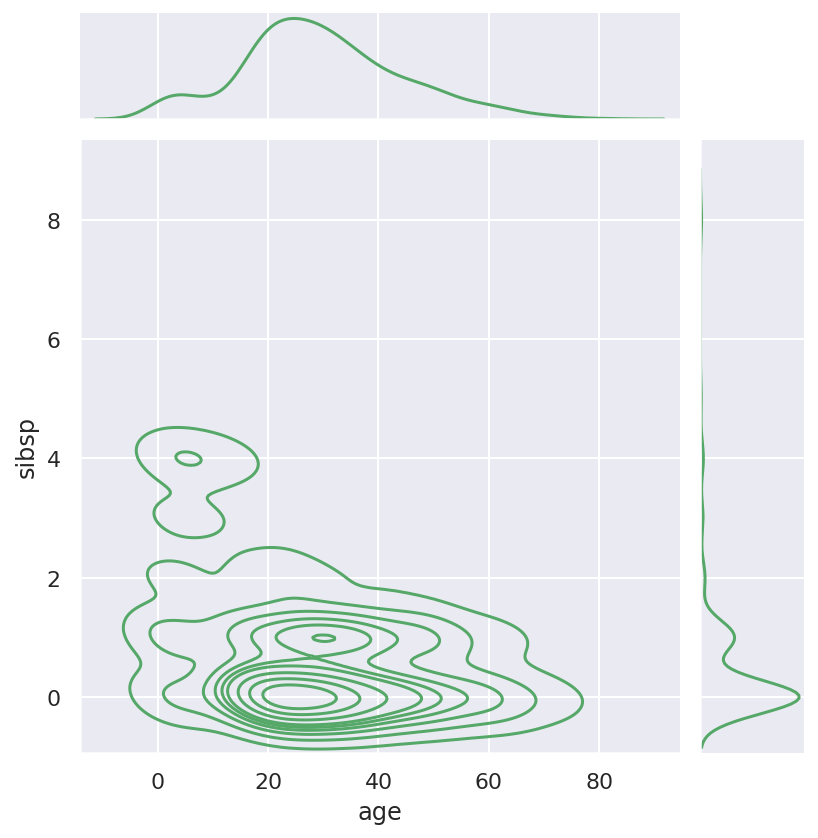

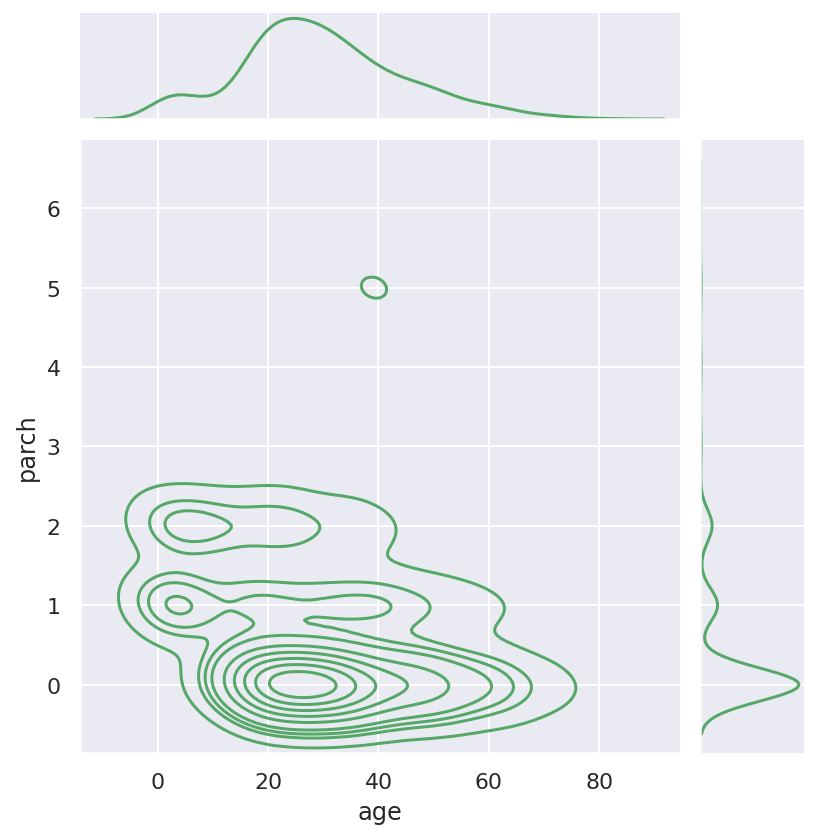

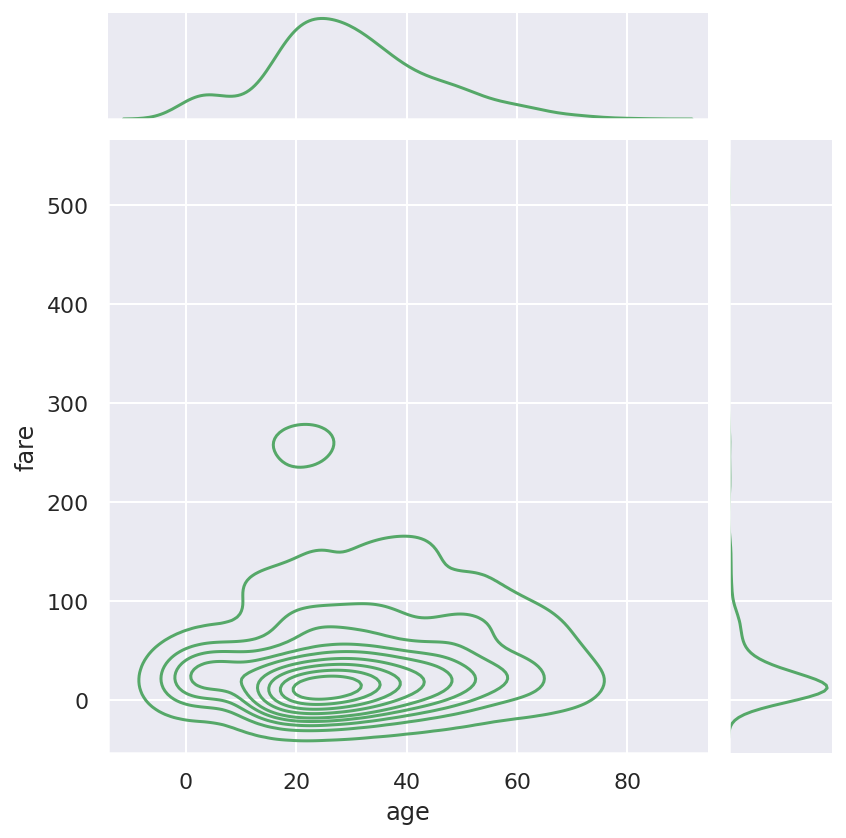

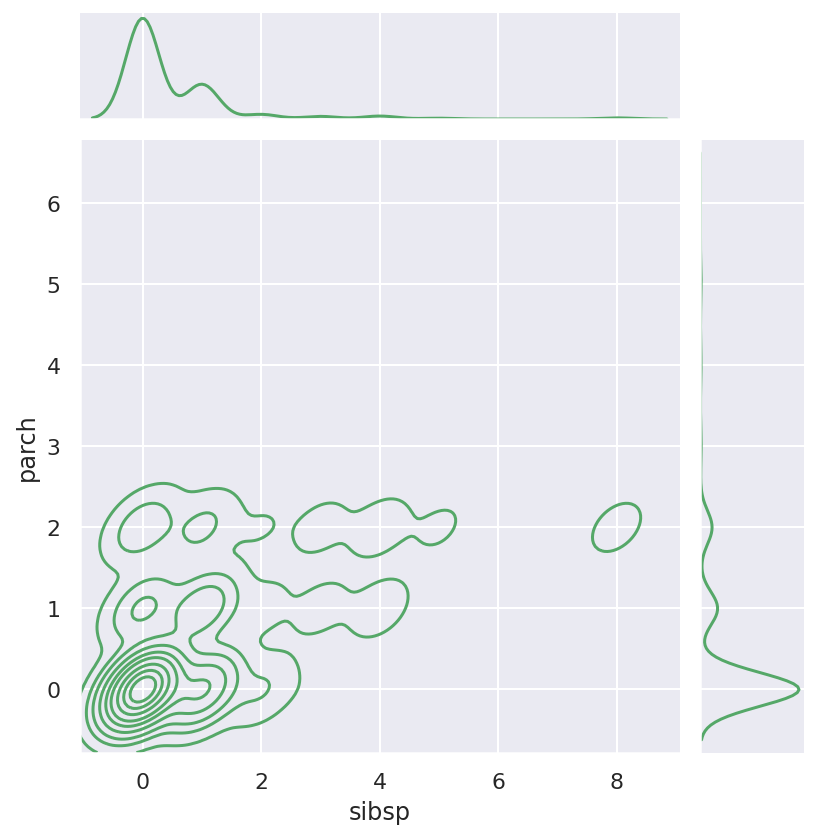

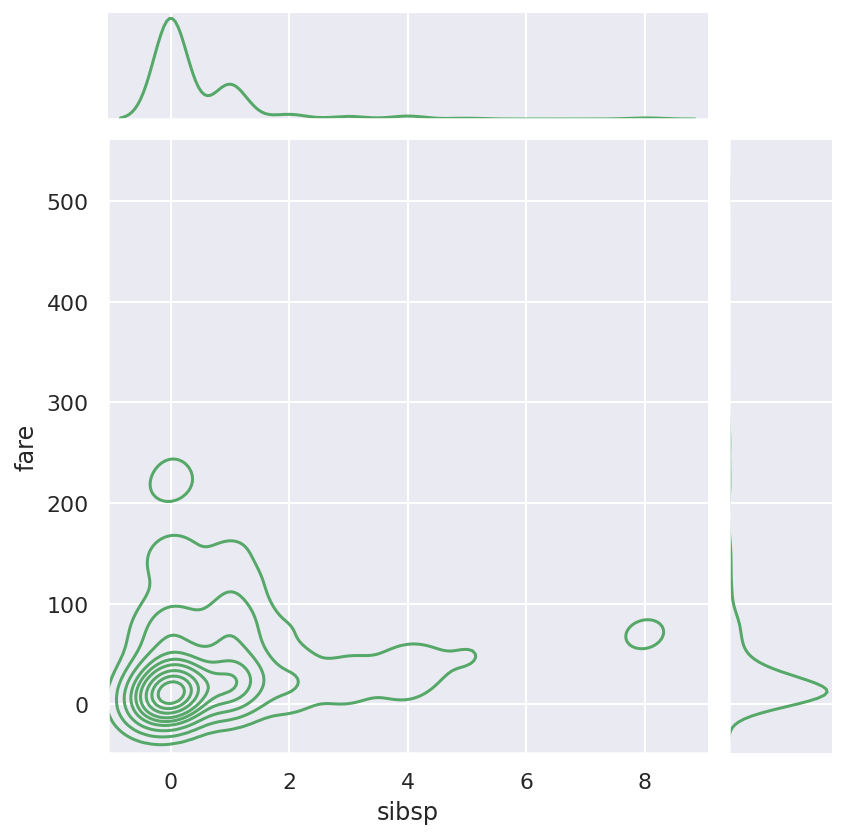

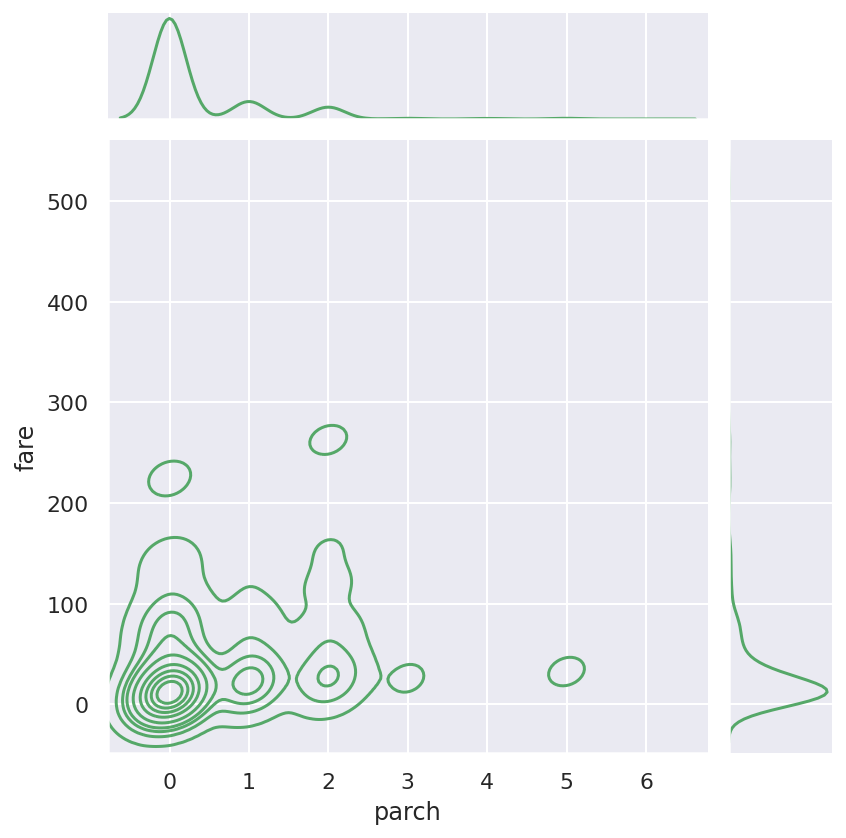

In [20]:

sns.set(rc={'figure.figsize':(20, 6)})

sns.jointplot(x="age", y="sibsp",   data=df, kind="kde", color="g")
sns.jointplot(x="age", y="parch",   data=df, kind="kde", color="g")
sns.jointplot(x="age", y="fare",    data=df, kind="kde", color="g")
sns.jointplot(x="sibsp", y="parch", data=df, kind="kde", color="g")
sns.jointplot(x="sibsp", y="fare",  data=df, kind="kde", color="g")
sns.jointplot(x="parch", y="fare",  data=df, kind="kde", color="g")


### Quantitativo vs Quantitativo: Matrix

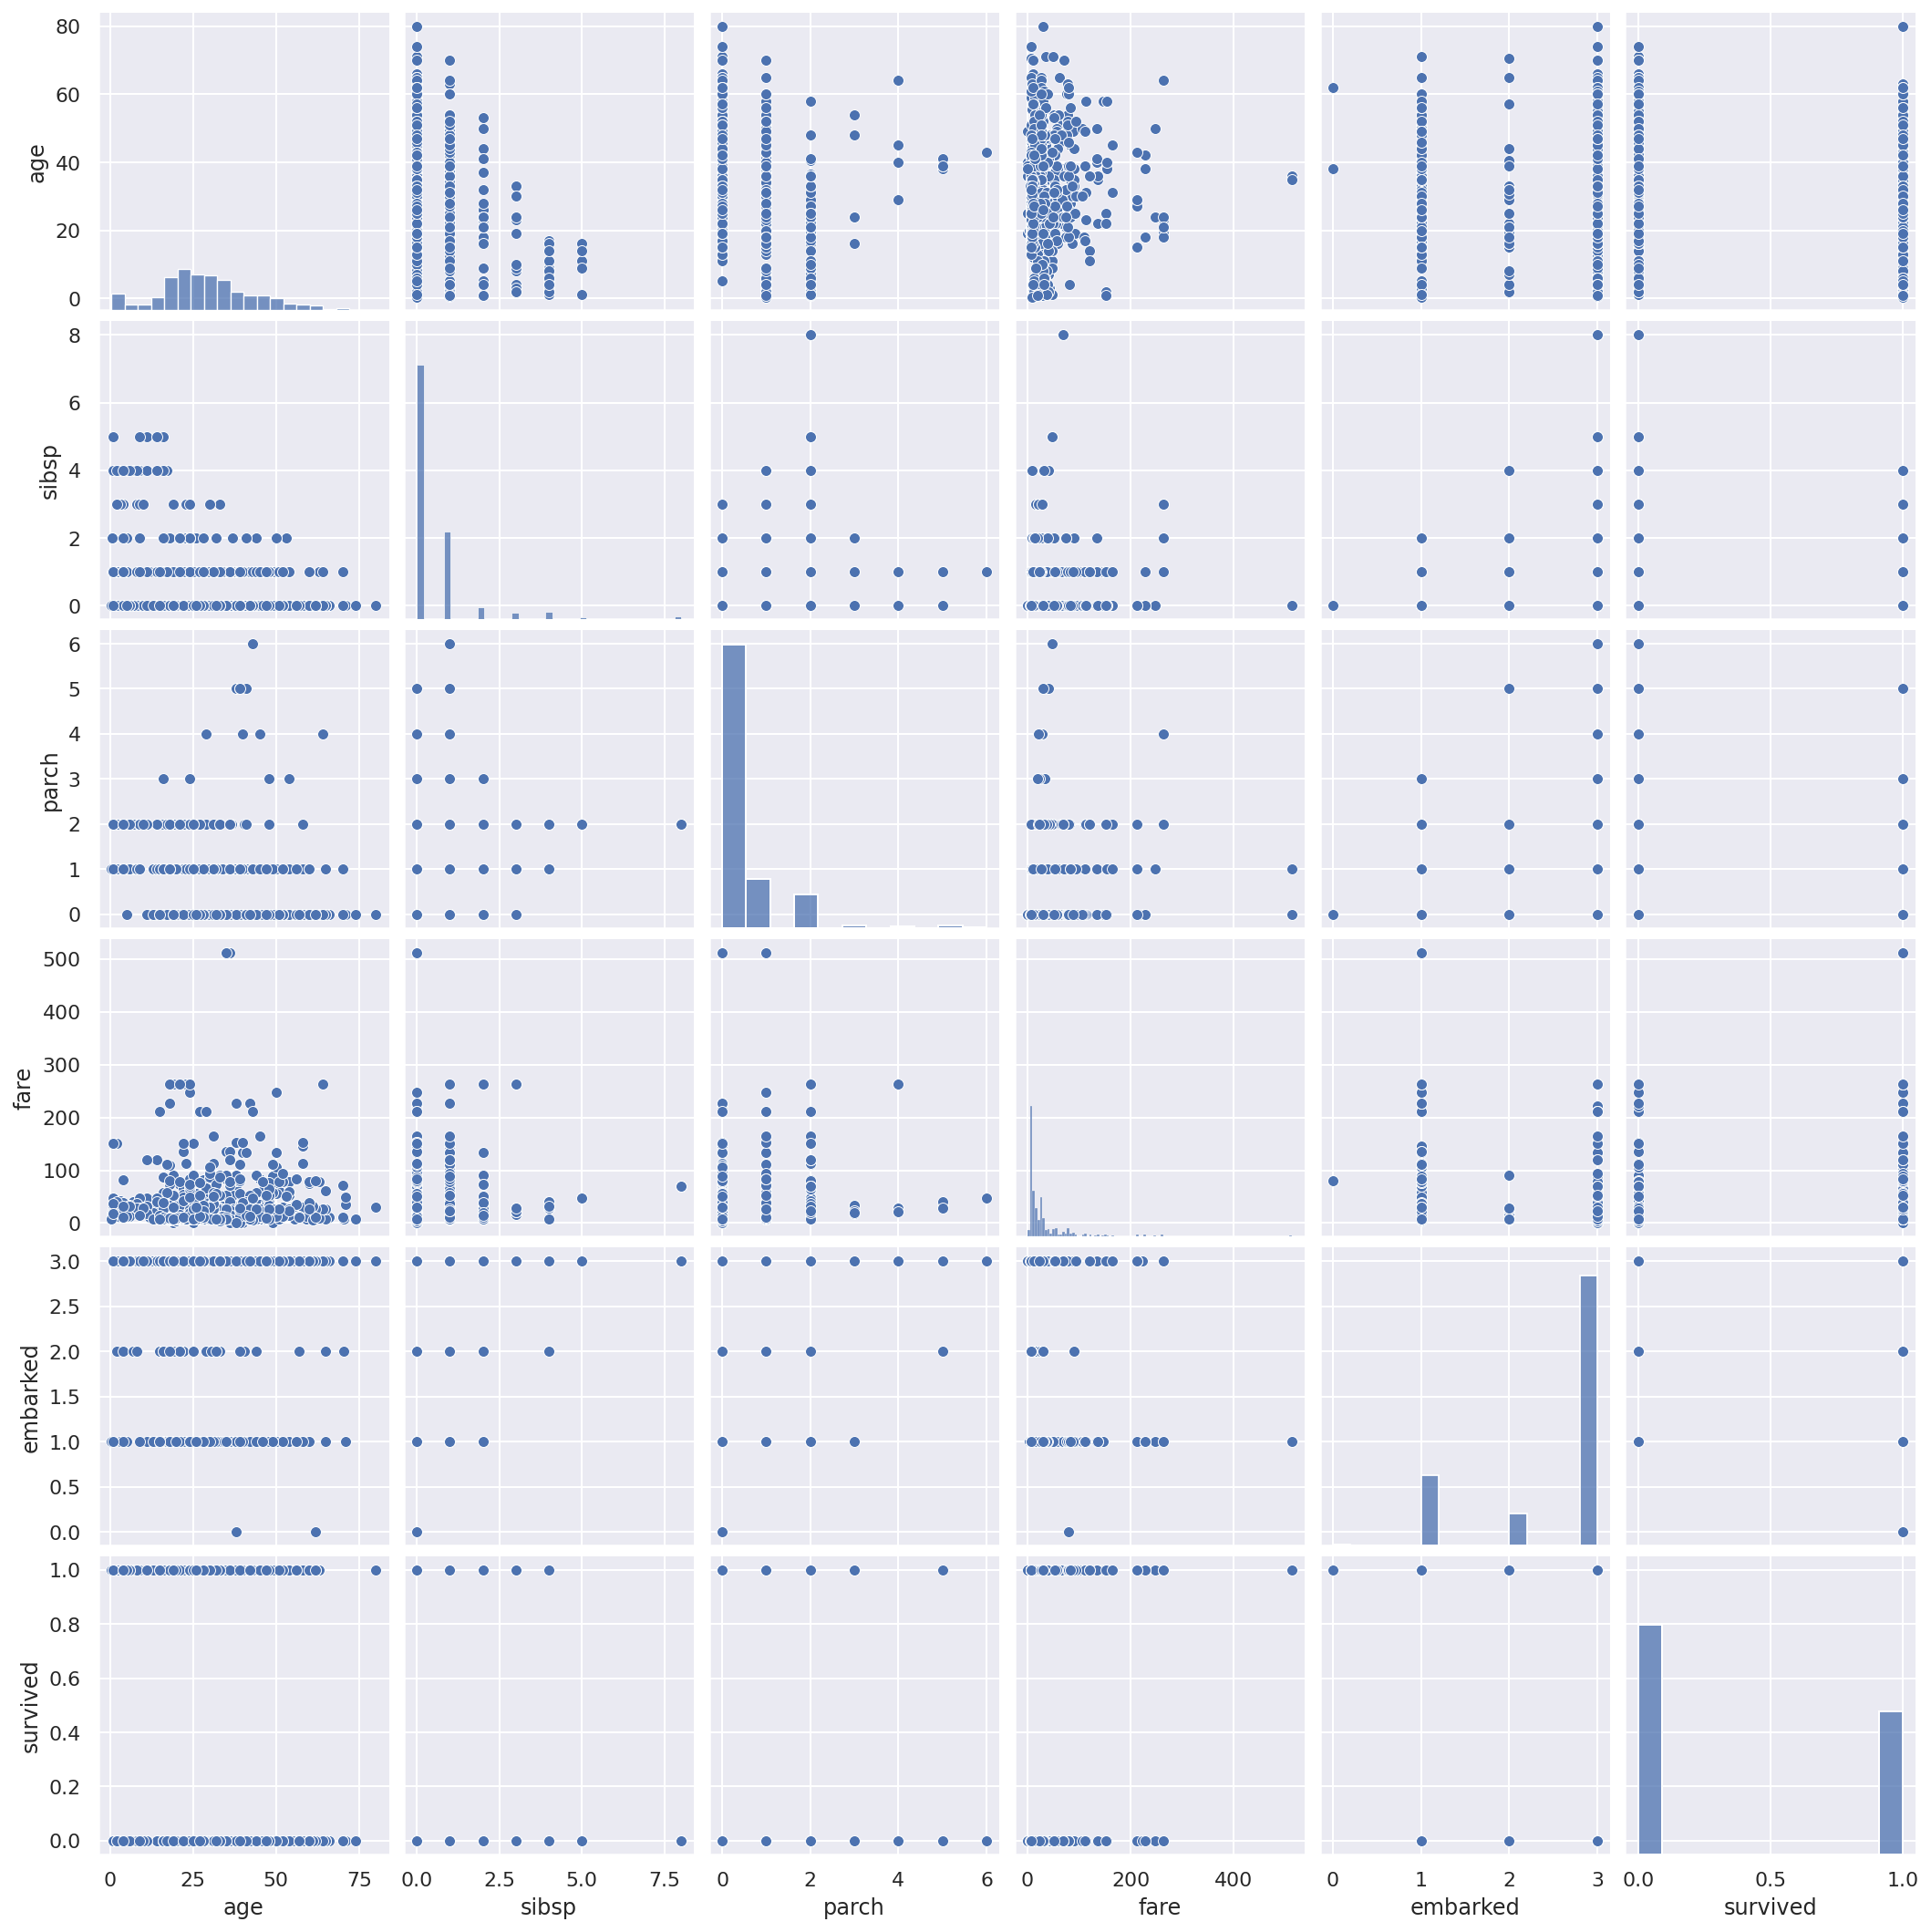

In [21]:
sns.pairplot(df[["age", "sibsp", "parch", "fare"] + ["embarked", "survived"]]);

### Quantitativo vs Qualitativo: Gráfico de pontos

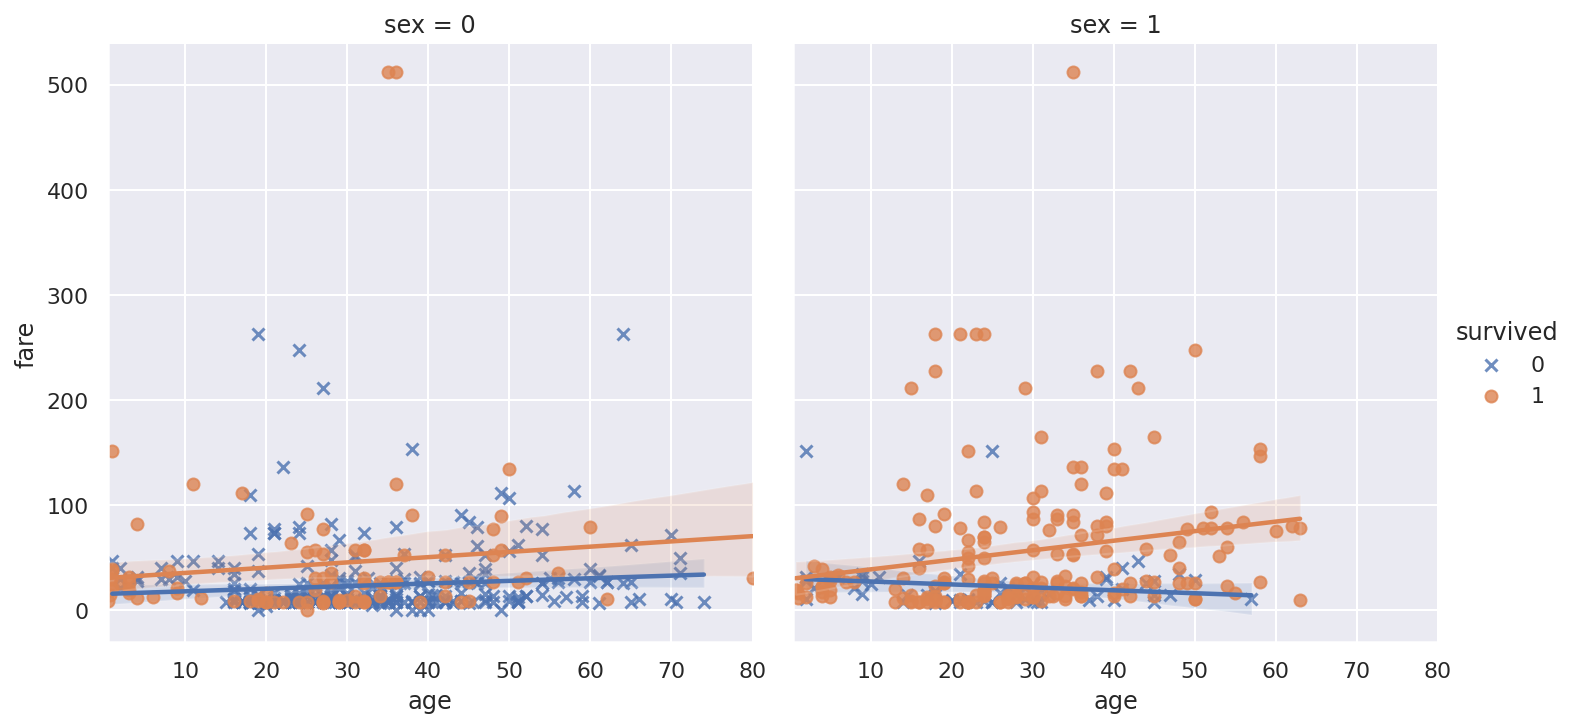

In [22]:
["age", "sibsp", "parch", "fare"] + ["embarked", "survived"]


sns.lmplot(x="age", y="fare", data=df, hue="survived", col="sex", fit_reg=True, markers=["x", "o"]);


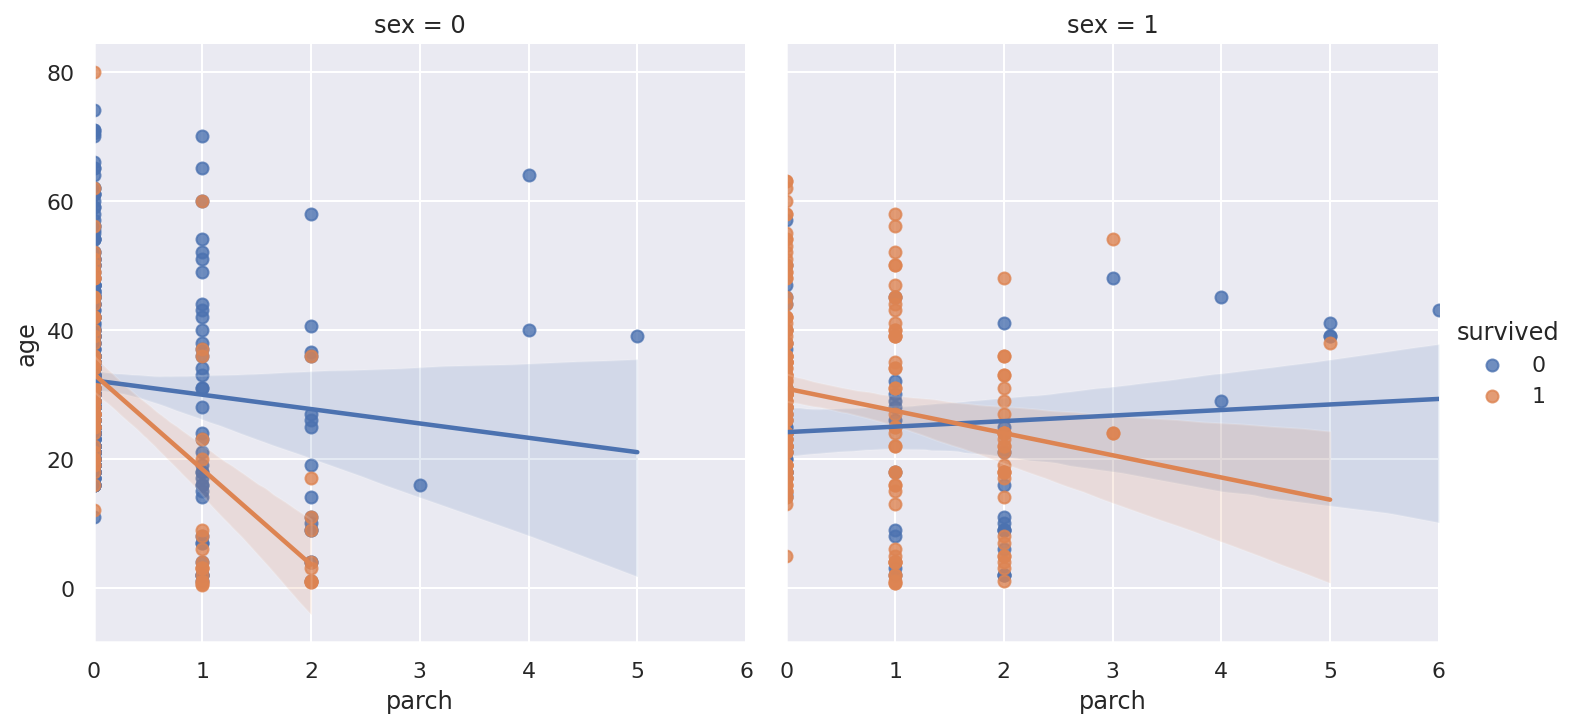

In [23]:

sns.lmplot(y="age", x="parch", data=df, col="sex", hue="survived", fit_reg=True);


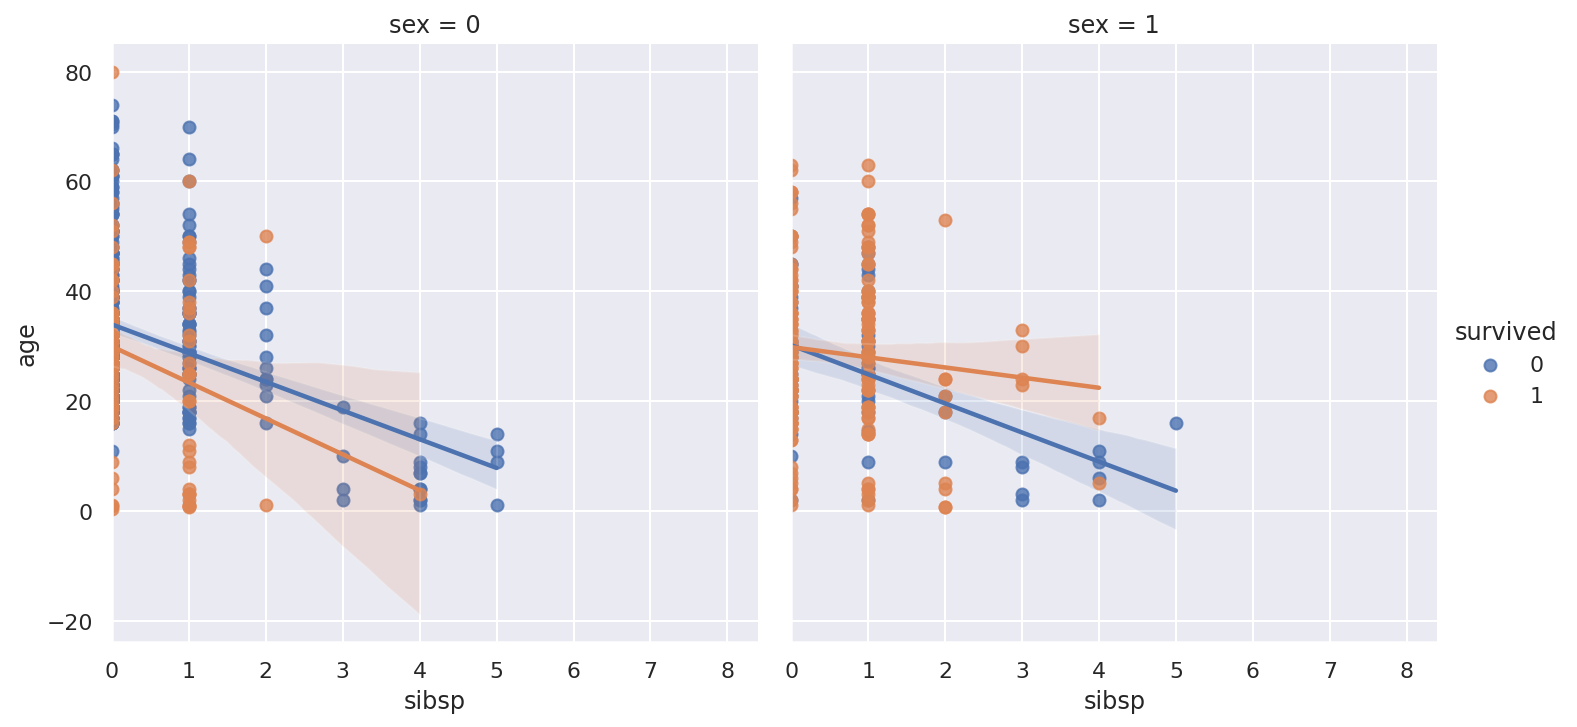

In [24]:

sns.lmplot(y="age", x="sibsp", data=df, col="sex", hue="survived", fit_reg=True);


### Quantitativo vs Qualitativo: Box plot

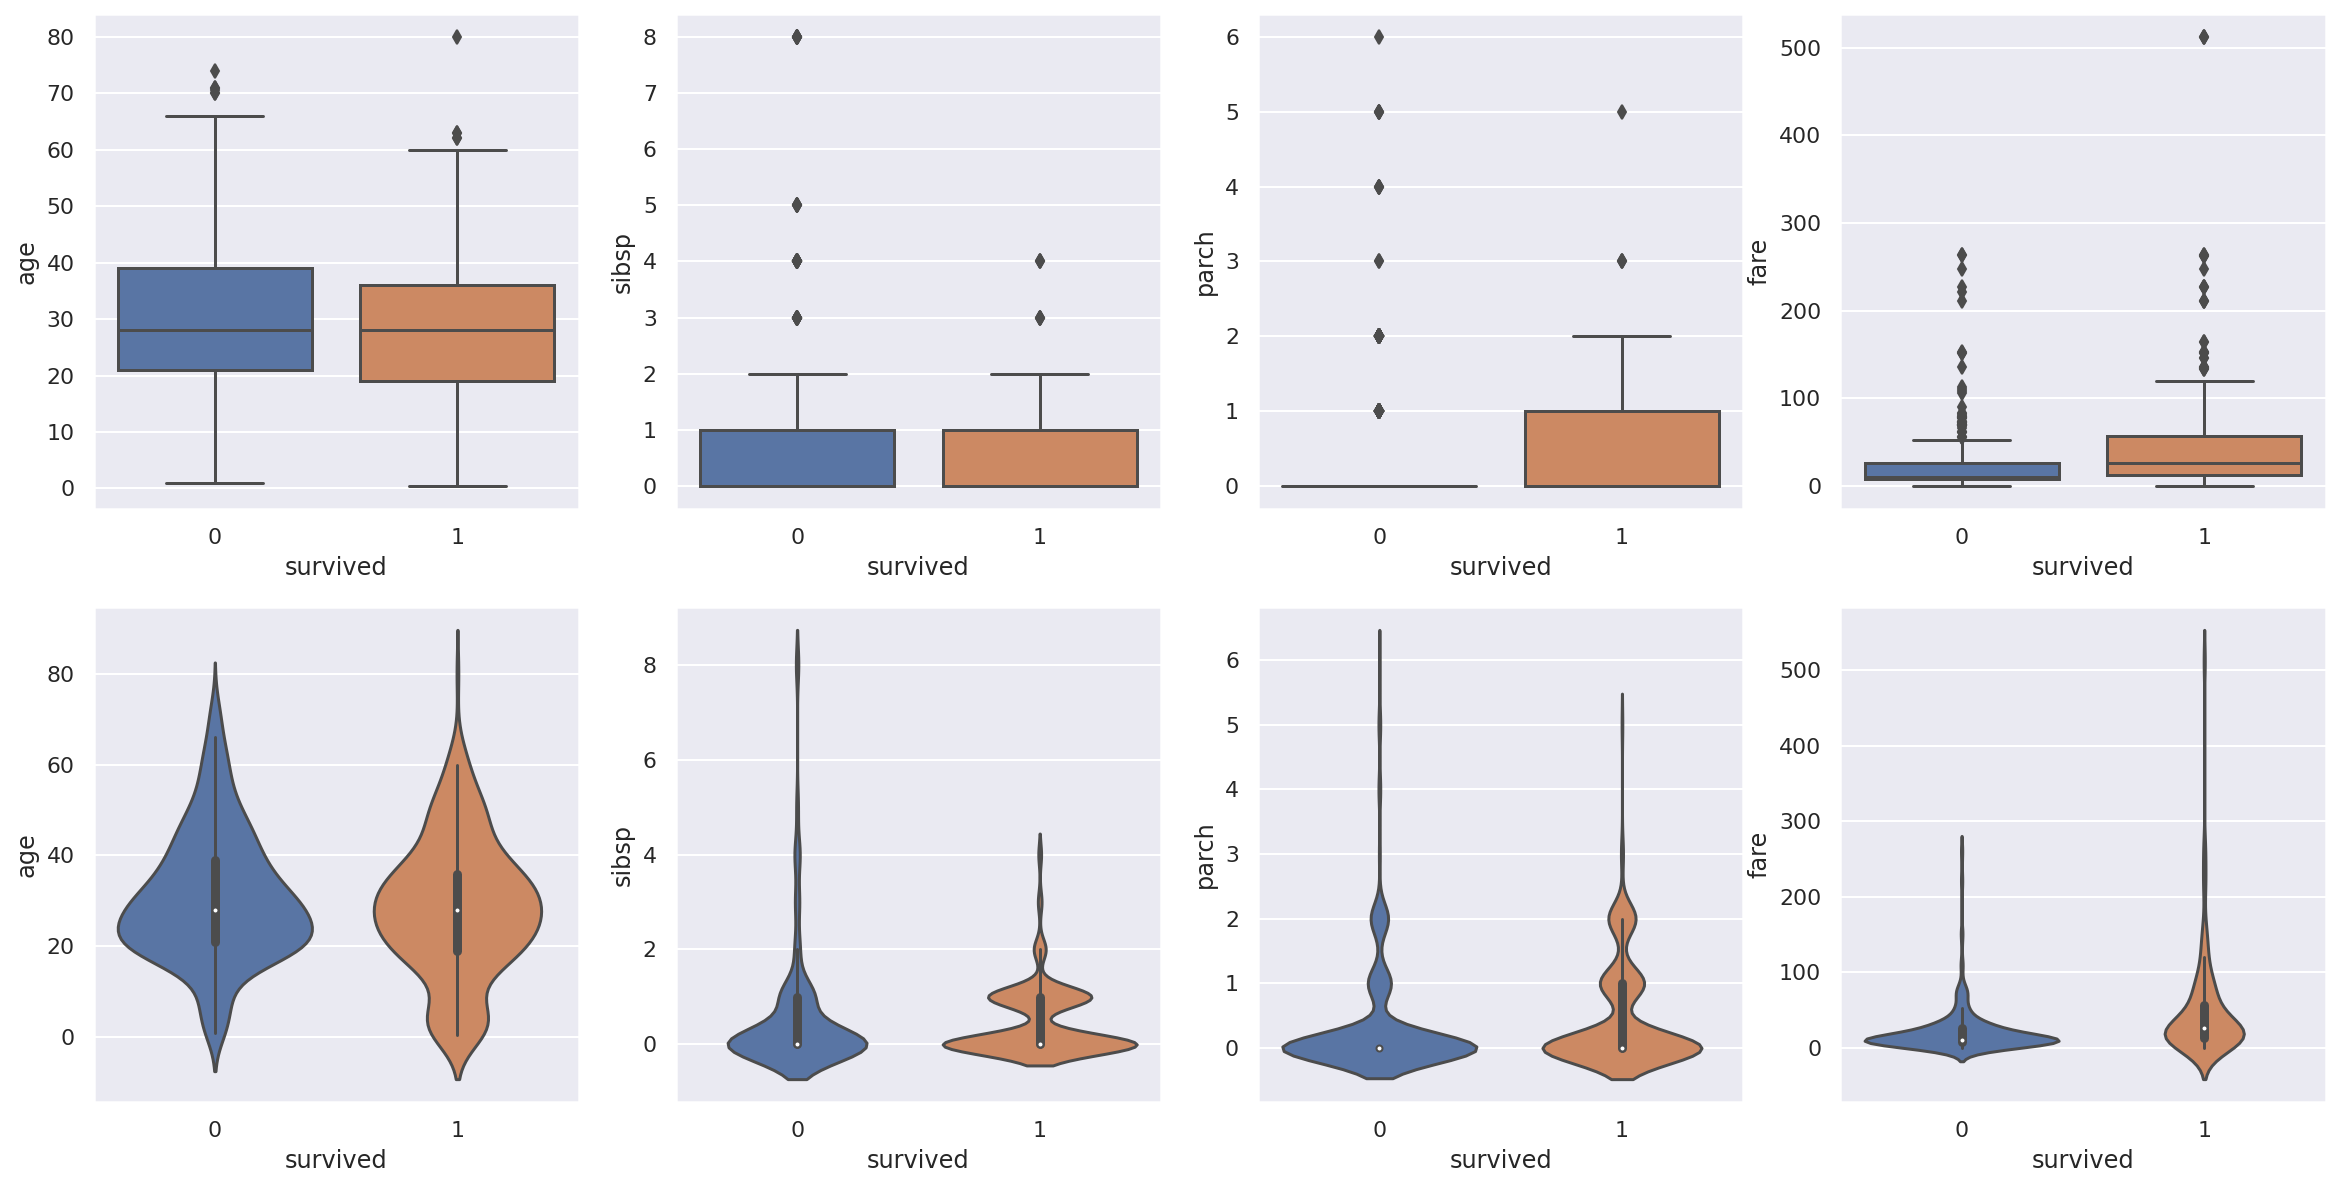

In [25]:
["age", "sibsp", "parch", "fare"] + ["embarked", "survived"]

fig, axes = plt.subplots(2, 4, sharey=False, sharex=False, figsize=(20, 10))

for i, col in enumerate(["age", "sibsp", "parch", "fare"]):
    sns.boxplot(y=col, x="survived", data=df, ax=axes[0][i])
    sns.violinplot(y=col, x="survived", data=df, ax=axes[1][i])


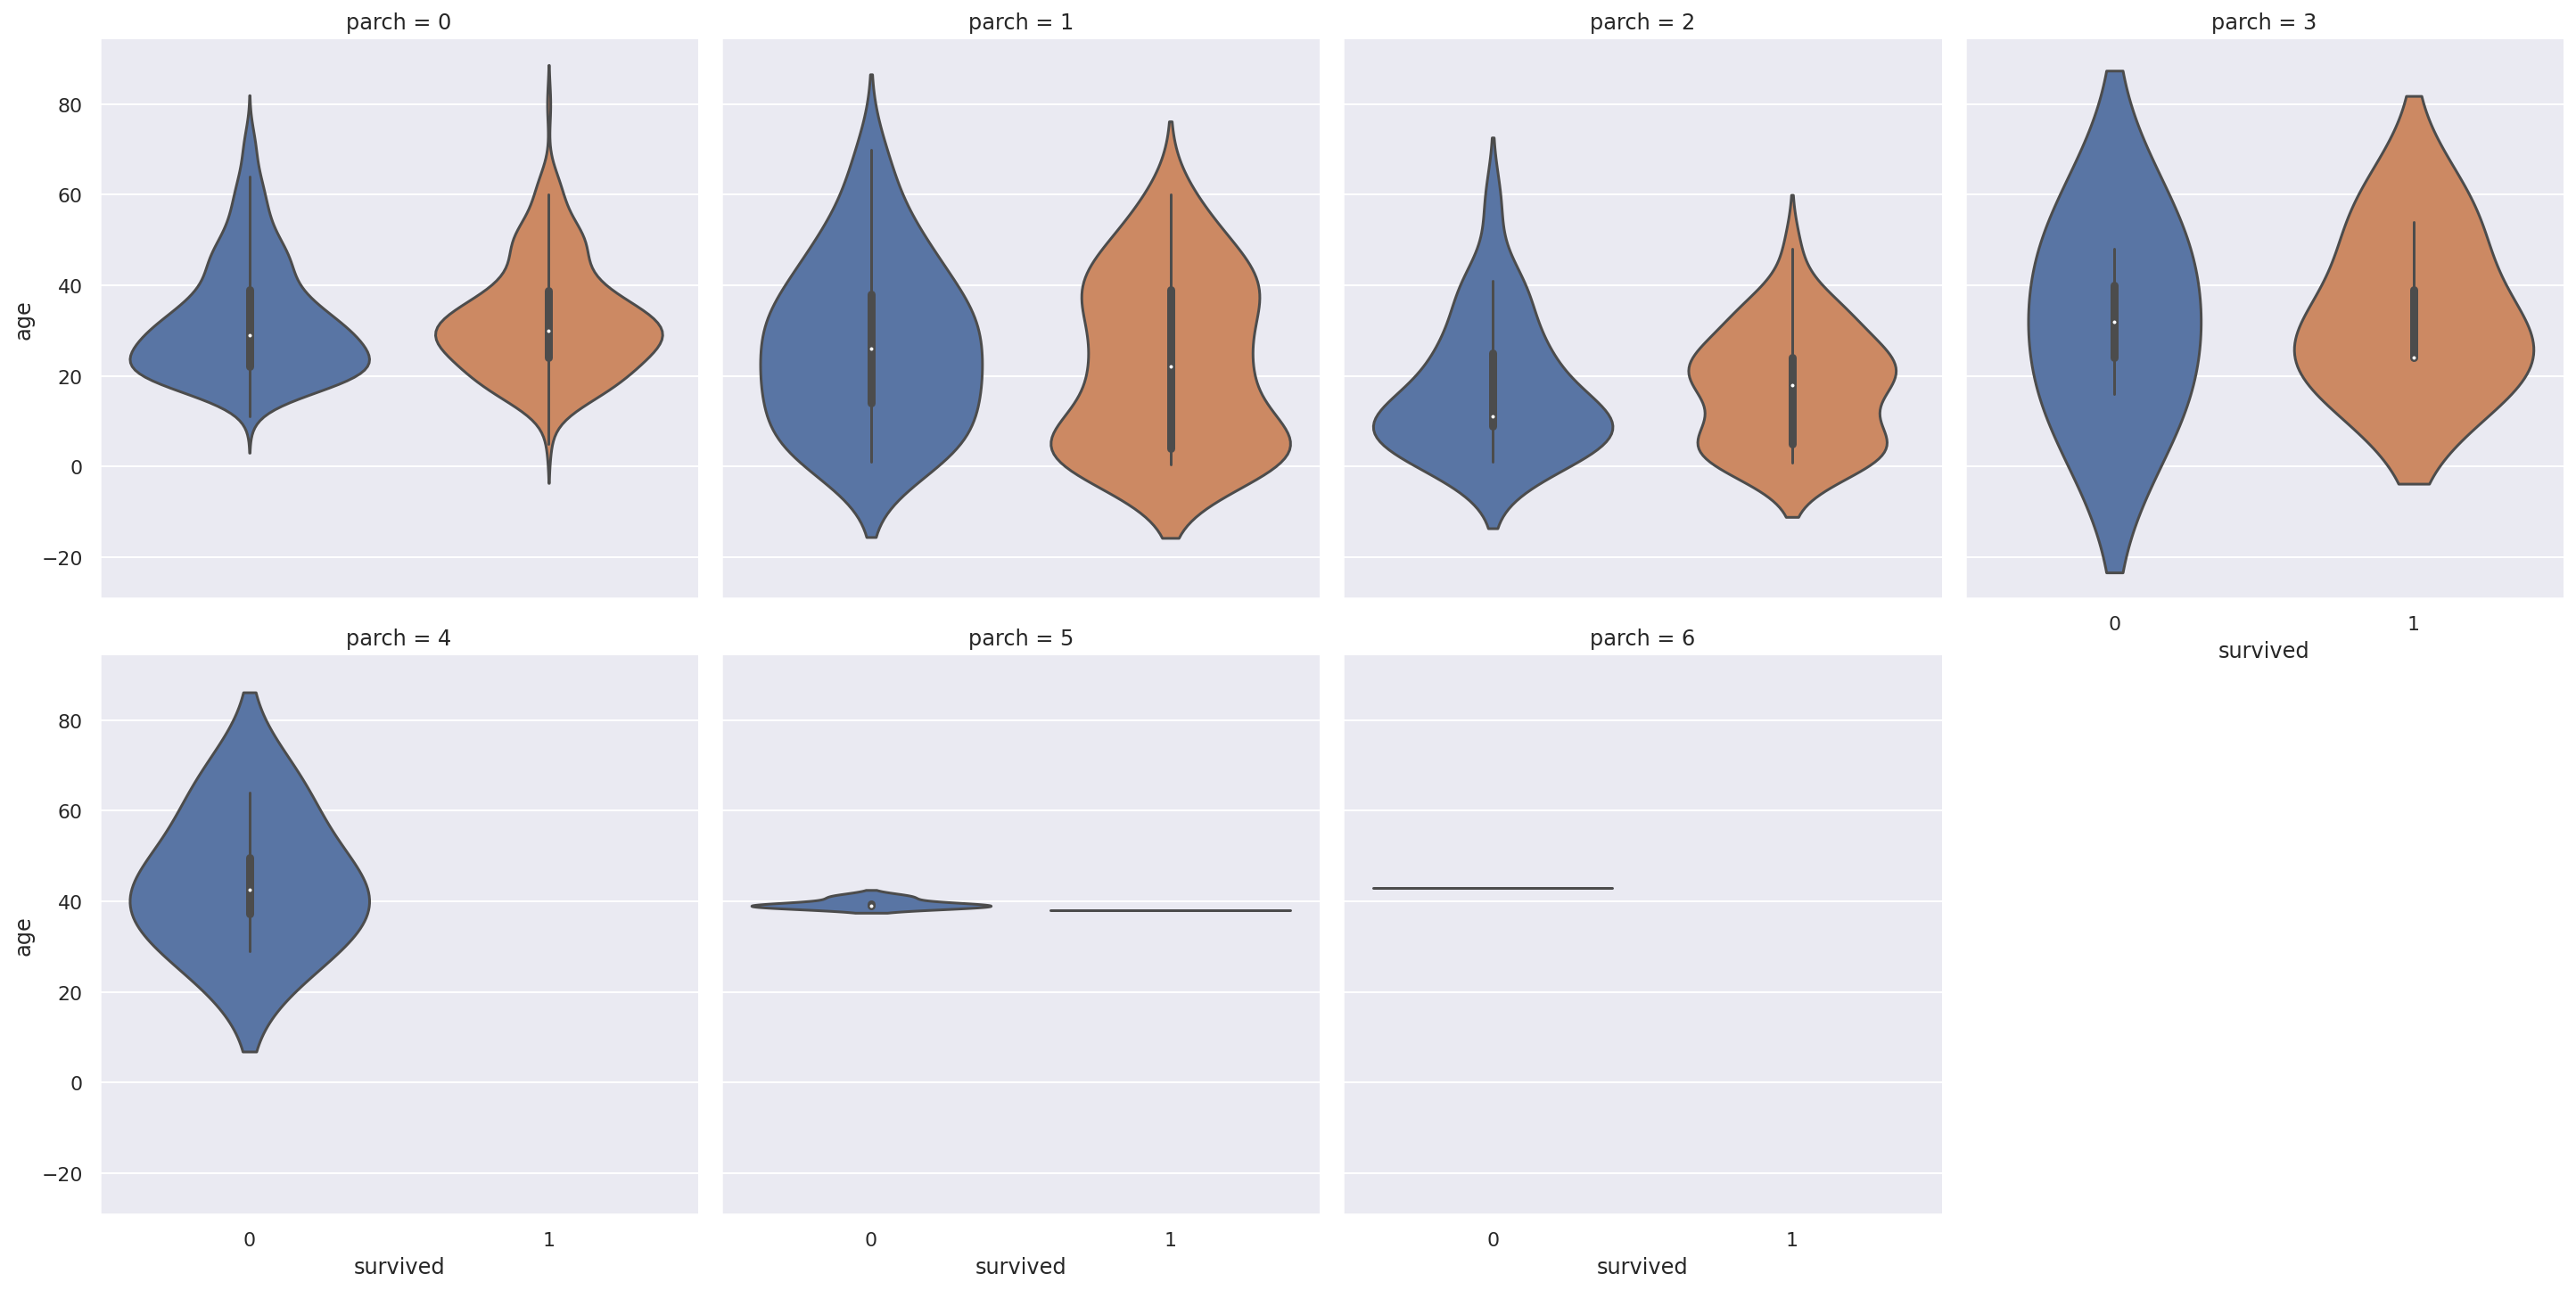

In [26]:

sns.catplot(
    x="survived", 
    y="age",
    col="parch", 
    data=df, 
    kind="violin",
    col_wrap=4
);


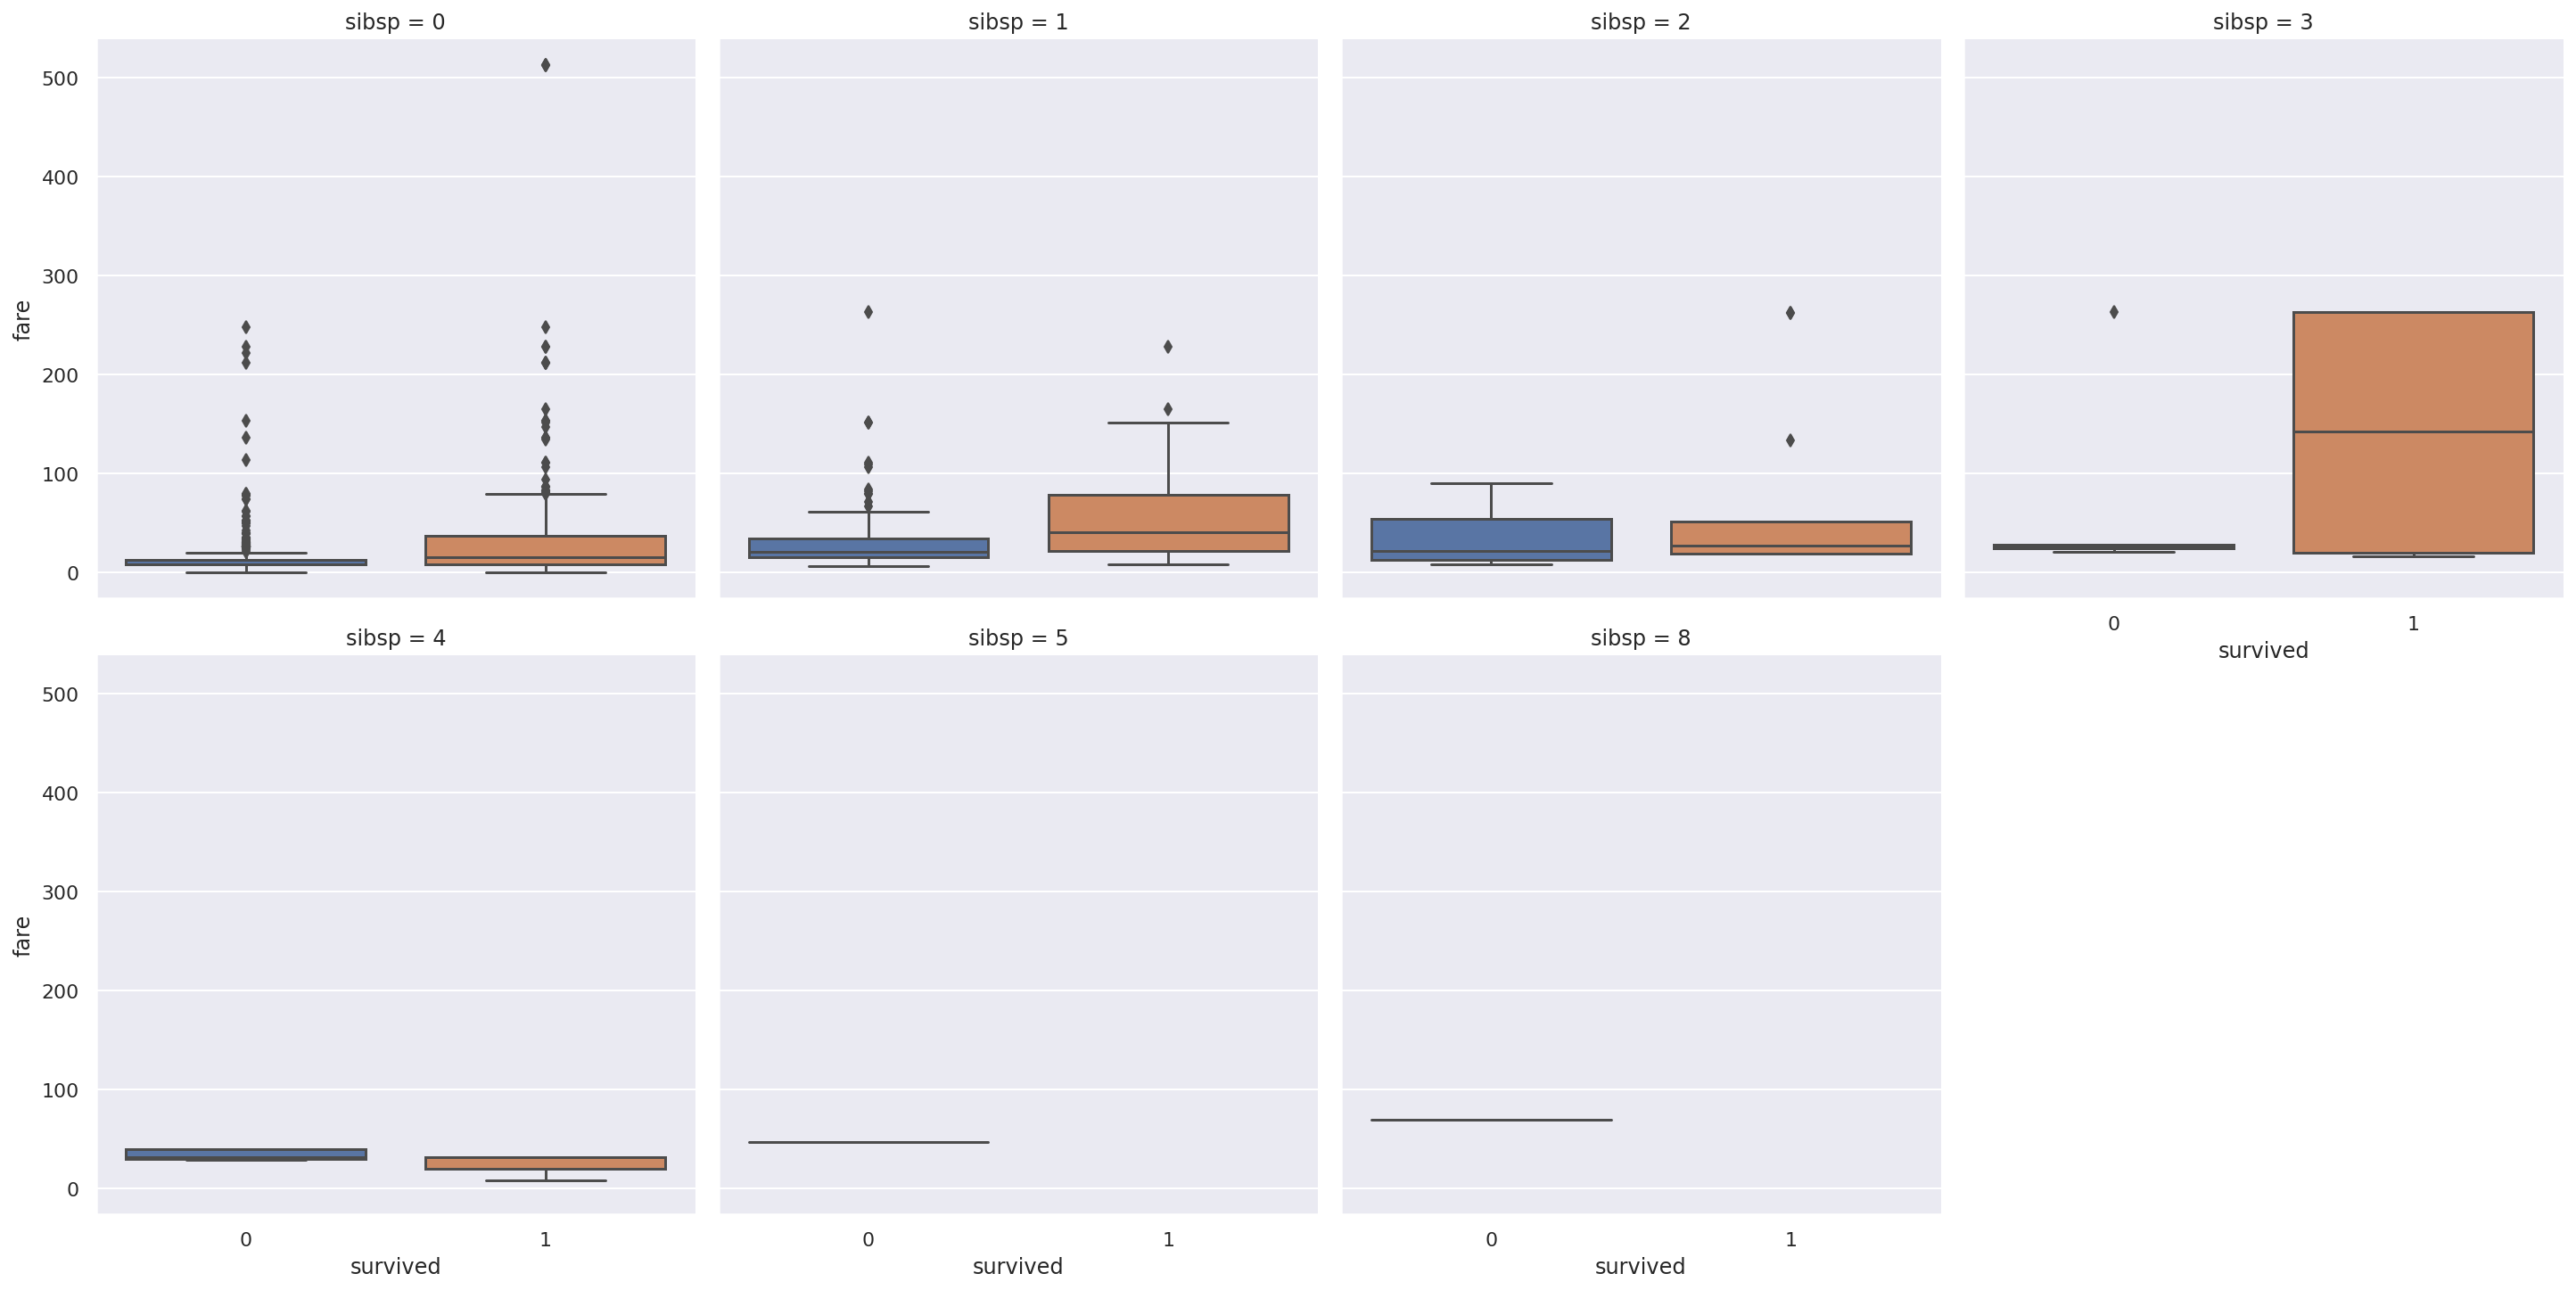

In [27]:

sns.catplot(
    x="survived", 
    y="fare",
    col="sibsp", 
    data=df, 
    kind="box",
    col_wrap=4
);


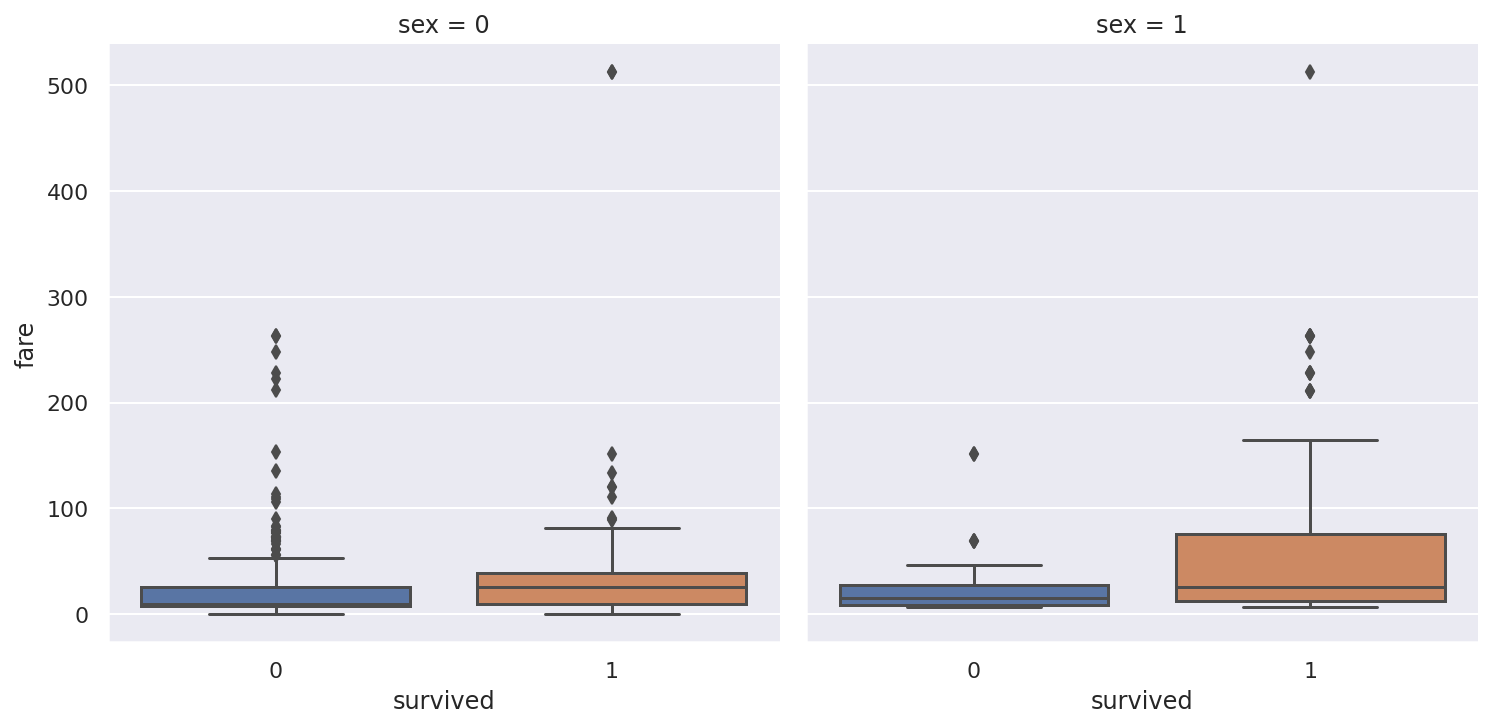

In [28]:

sns.catplot(
    x="survived", 
    y="fare",
    col="sex", 
    data=df, 
    kind="box",
    col_wrap=4
);


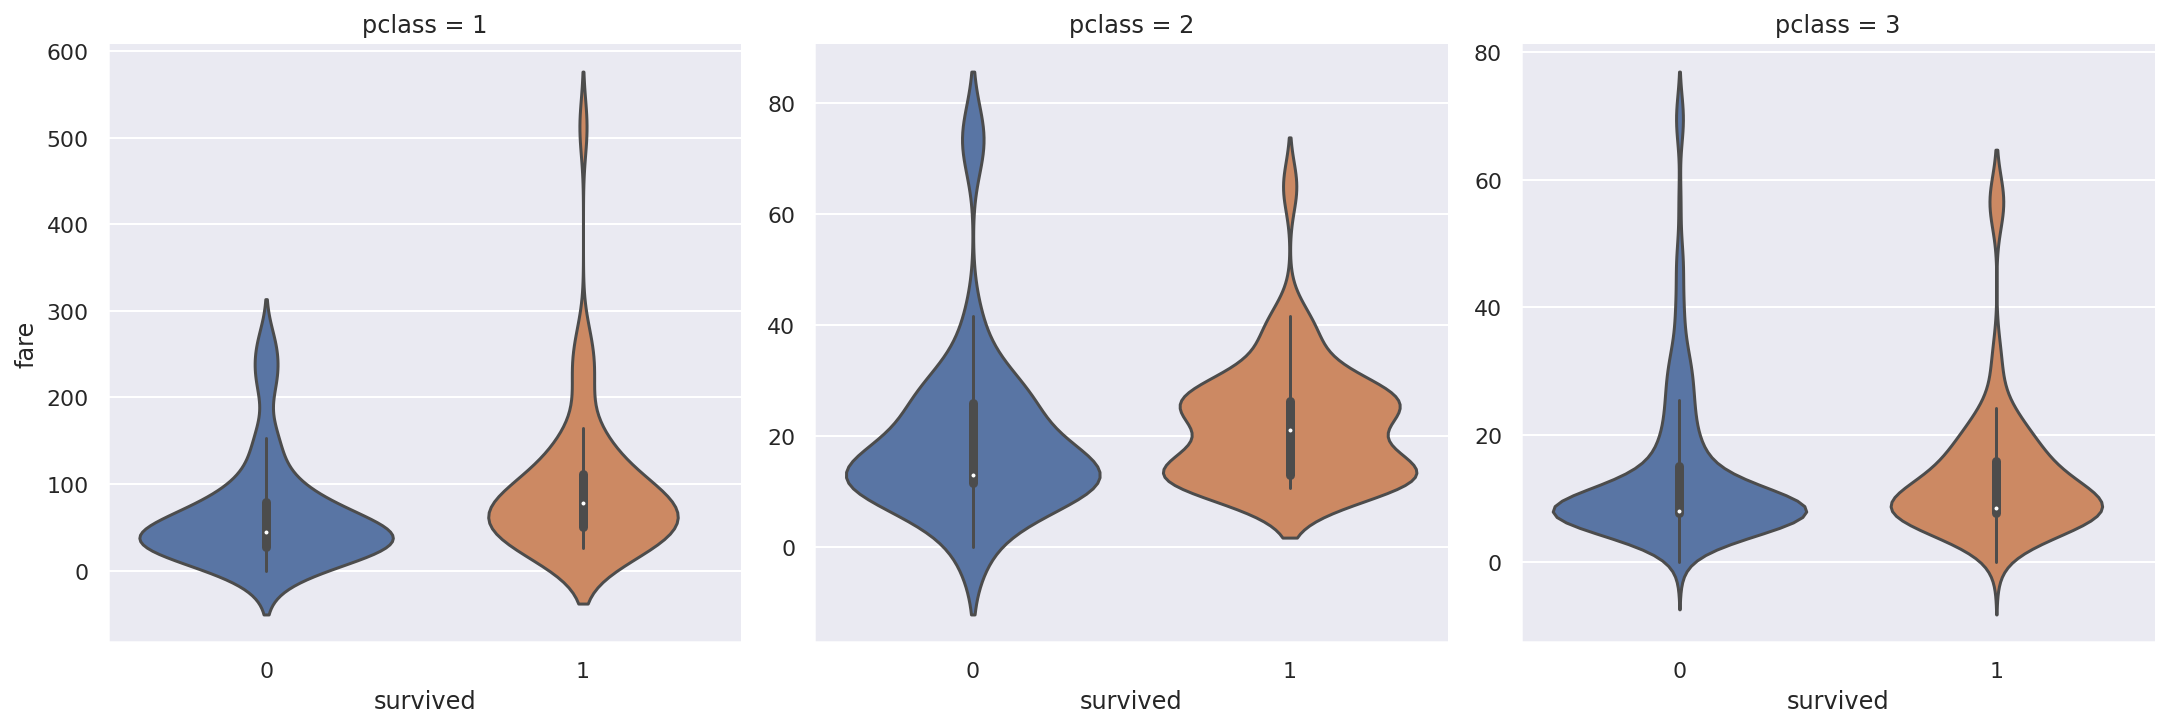

In [29]:

sns.catplot(
    x="survived", 
    y="fare",
    col="pclass", 
    data=df, 
    kind="violin",
    sharey=False,
    col_wrap=3
);


### Qualitativo vs Qualitativo: 

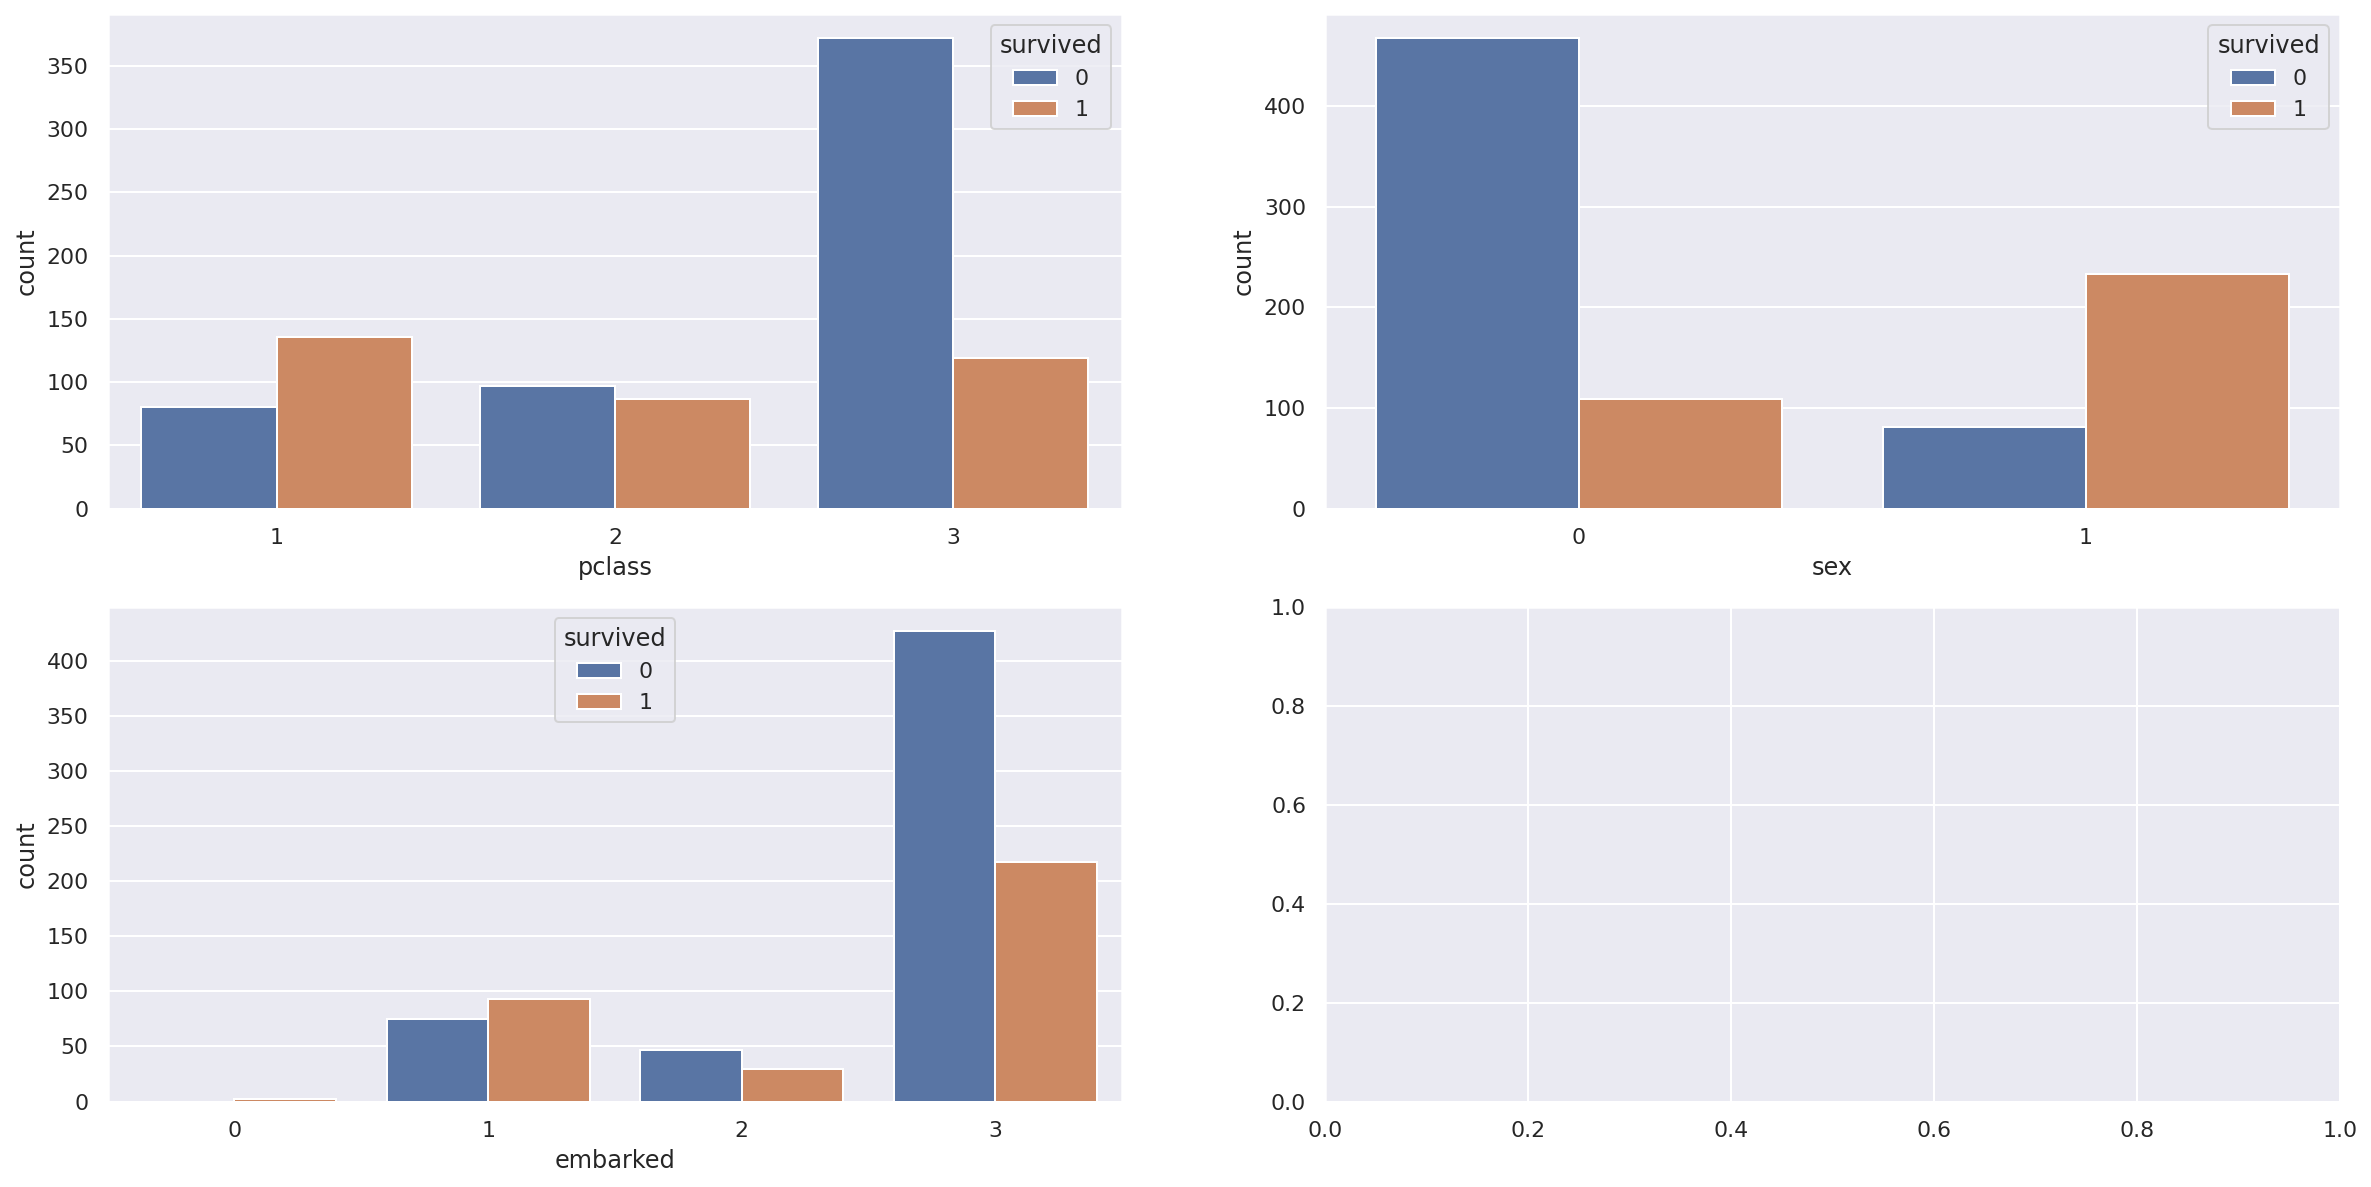

In [30]:
grid = (2, 2)

_, axes = plt.subplots(grid[0], grid[1], sharey=False, sharex=False, figsize=(20, 10))

for i, col in enumerate(["pclass", "sex", "embarked"]):
    sns.countplot(x=col, hue="survived", data=df, ax=axes[int(i/grid[0])][i % grid[1]])